# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- **normalized_used_price**: Normalized price of the used/refurbished device in euros (target variable, aka dependent variable).

## Importing necessary libraries

In [10]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading data
data = pd.read_csv('/content/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [4]:
# observe the first few rows
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
# check the shape of the dataset
print("There are", data.shape[0], "rows and", data.shape[1], "columns in the dataset.")

There are 3454 rows and 15 columns in the dataset.


In [ ]:
# check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observations:

* Data types: Data contains a mix of numeric (float and int) and categorical (object) types (`brand_name`, `os`, `4g`, `5g`) wchich will require encoding before model fitting.
* Missing Values: of the numerical variables below the missing values must be handled:
 `main_camera_mp`,`selfie_camera_mp`,`int_memory`,`ram`,`battery`, and `weight`.
* Potential Feature Engineering: new features such as device age from release_year and days_used.

In [ ]:
# statistical summary of numerical and categorical variables
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


Observations:

* Android is the most common `os`.
* Most devices support `4g`.
* Only 152 out of 3454 support `5g`.
* The majority of devices are relatively recent (post-2013) and have been used for less than 3 years (1094 days÷365 days/year≈3).
* Avarage price (both used and new) is low, ~4 and 5euros (respectively) with a small variability, indicating that the dataset includes primarily affordable devices.

In [ ]:
# check for duplicate entries in the data
data.duplicated().sum()

0

In [ ]:
# check for missing values for each column
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations:

`main_camera_mp` has the most missing values

## Initial Exploratory Data Analysis (EDA)

Make a copy of the data before the initial EDA in order to preserve the structure of the original dataset while exploring it.

Initial EDA does not fundamentally change the raw data in the original dataset but it may involve some level of data manipulation such as filtering, creating new columns etc.  

In [6]:
# make a cupy of the original data to perform EDA on while retaining the original datast without any modifications
df_eda = data.copy()

### Univariate Analysis

#### Numerical Features


In [7]:
def plot_hist_and_box(df_eda, variable, size=(16, 8), density_curve=False, num_bins=None):
    """
    Creates a plot with both a histogram and boxplot for a specified numerical variable.

    Args:
    - df_eda: The DataFrame containing the data.
    - variable: The name of the numerical variable to be plotted.
    - size: A tuple representing the size of the figure.
    - density_curve: A boolean indicating whether to overlay a KDE curve on the histogram.
    - num_bins: An integer representing the number of bins for the histogram, or None for automatic bin size.

    Returns:
    None
    """
    # Set up the matplotlib figure with two rows and one column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=size, sharex=True, gridspec_kw={'height_ratios': [0.2, 0.8]})

    # Plot the boxplot on the first row
    sns.boxplot(x=variable, data=df_eda, ax=ax1, showmeans=True, color="lightblue")
    ax1.set(xlabel='', title=f'Distribution and Boxplot of {variable}')

    # Plot the histogram on the second row
    if num_bins:
        sns.histplot(data[variable], kde=density_curve, bins=num_bins, ax=ax2, color="lightblue")
    else:
        sns.histplot(data[variable], kde=density_curve, ax=ax2, color="lightblue")

 # Draw lines for mean and median
    mean_val = df_eda[variable].mean()
    median_val = df_eda[variable].median()
    ax2.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax2.axvline(median_val, color='black', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    # Add legend to the histogram
    ax2.legend()

    plt.show()


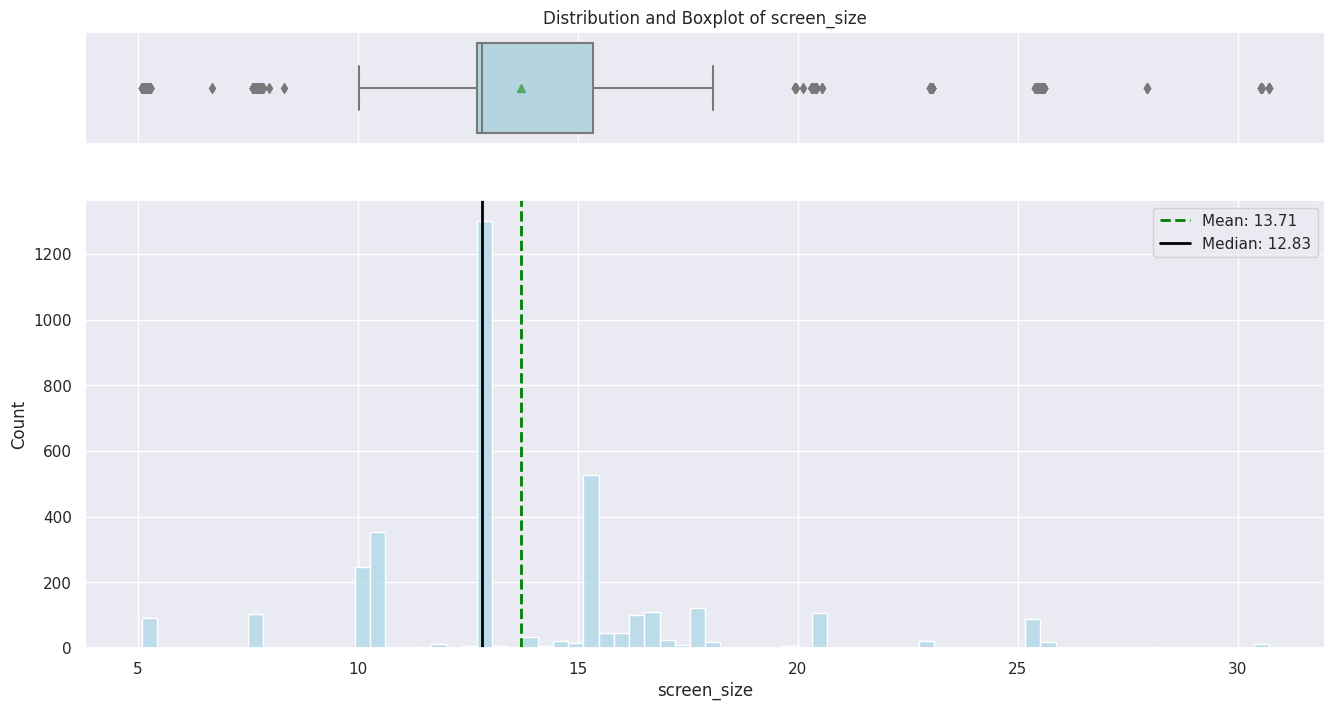

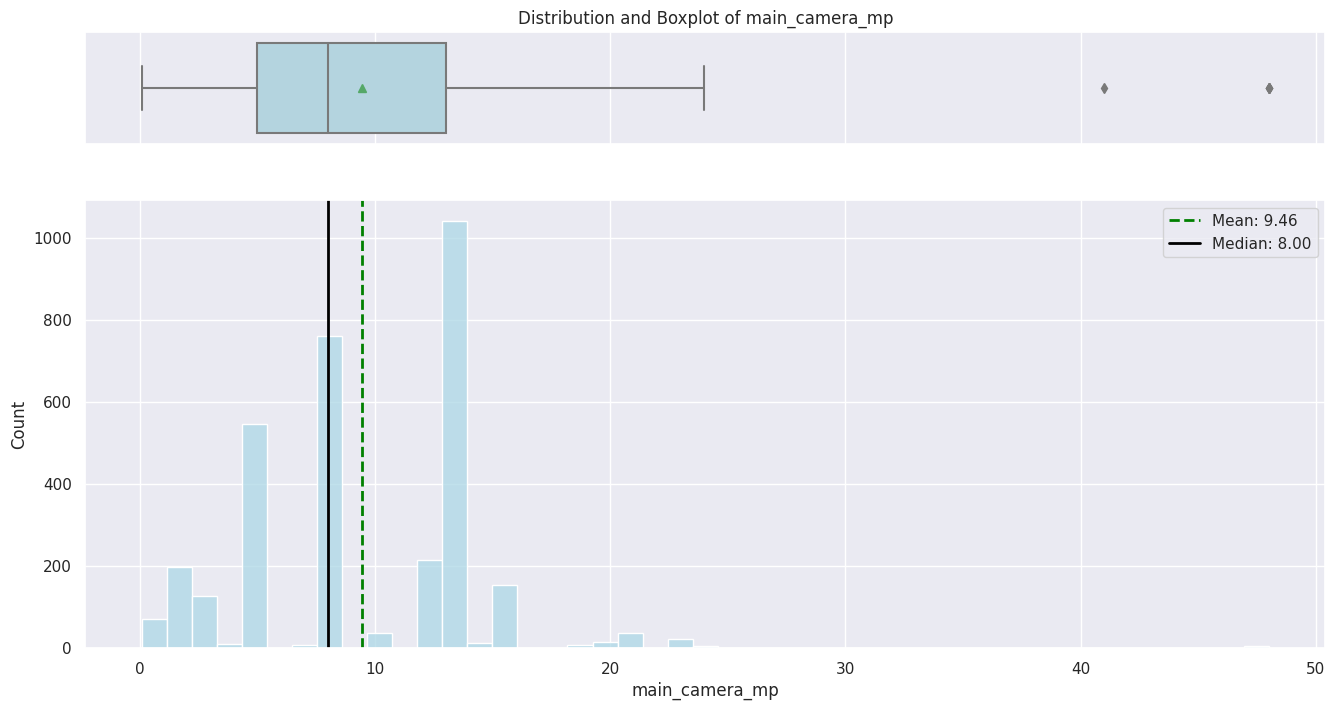

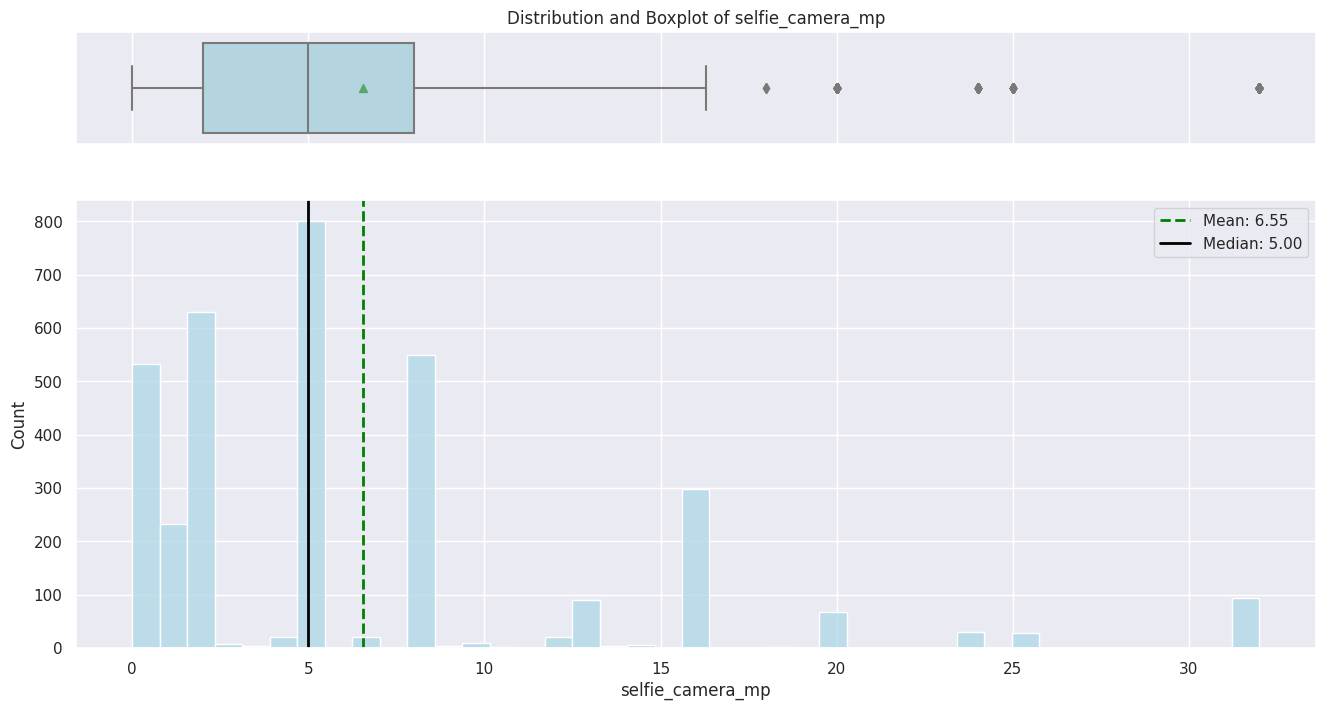

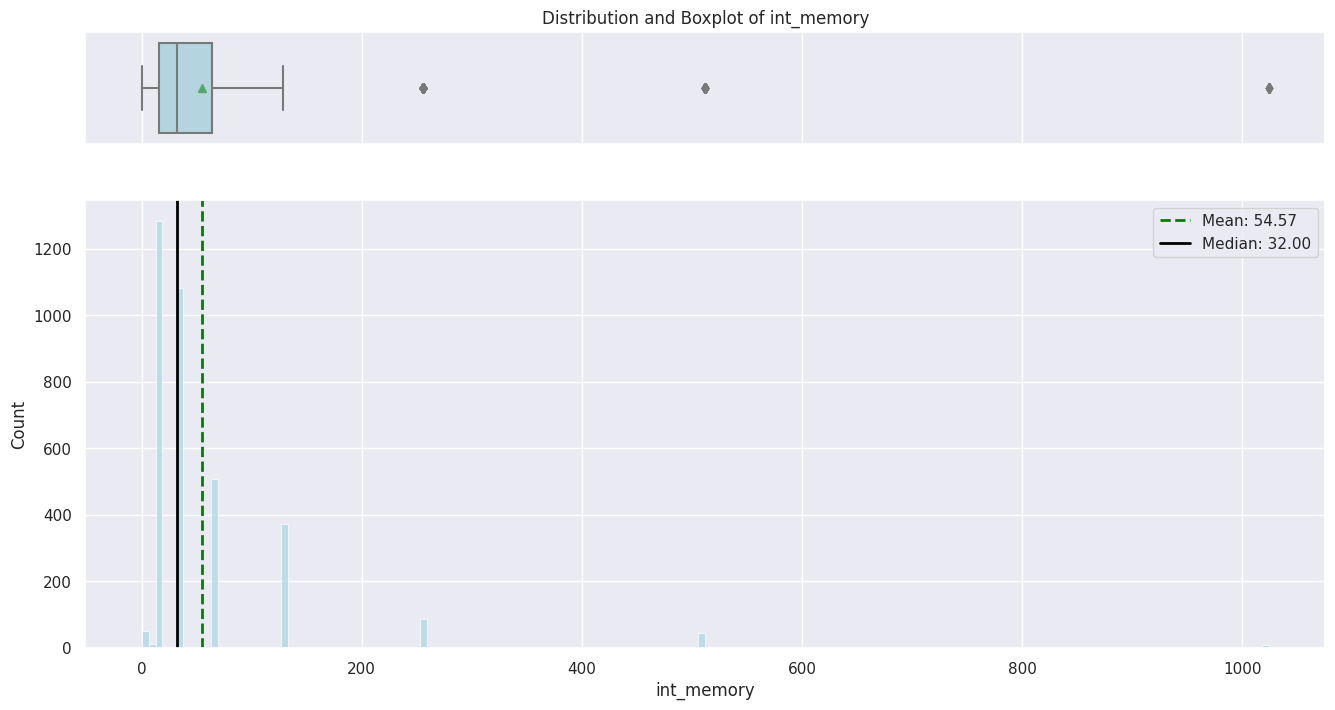

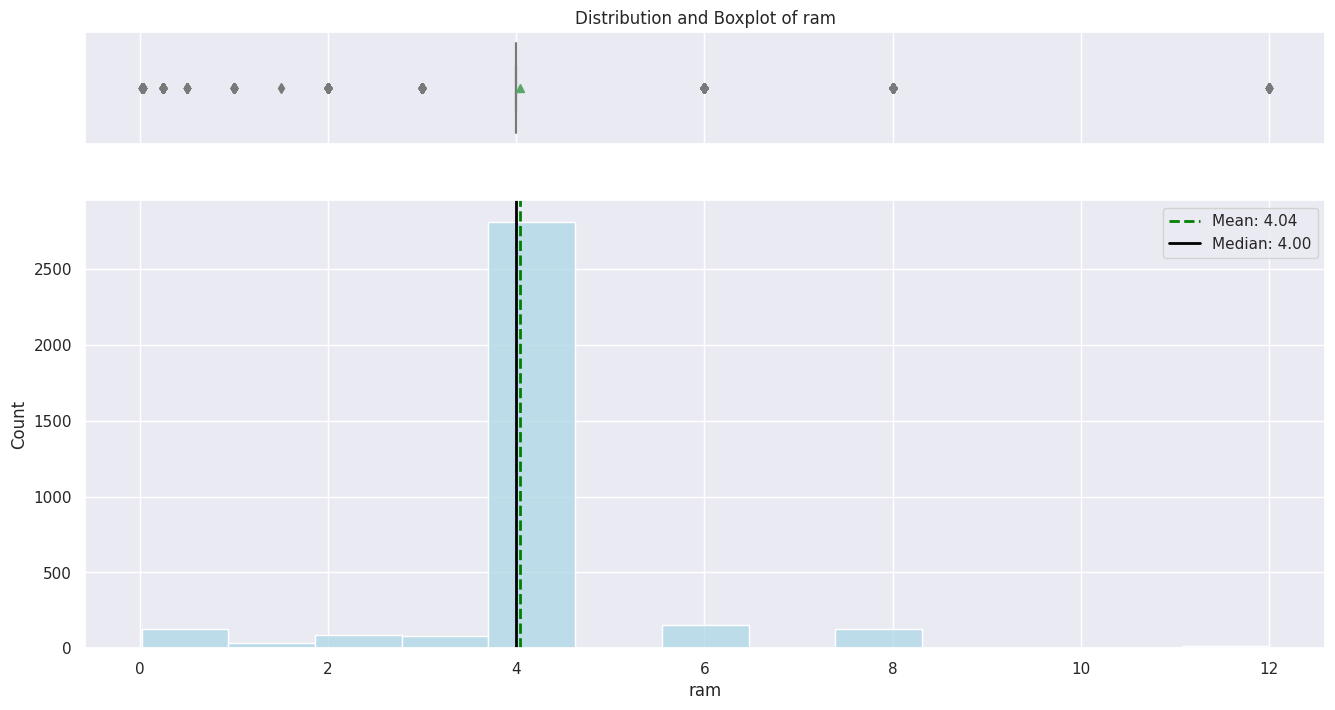

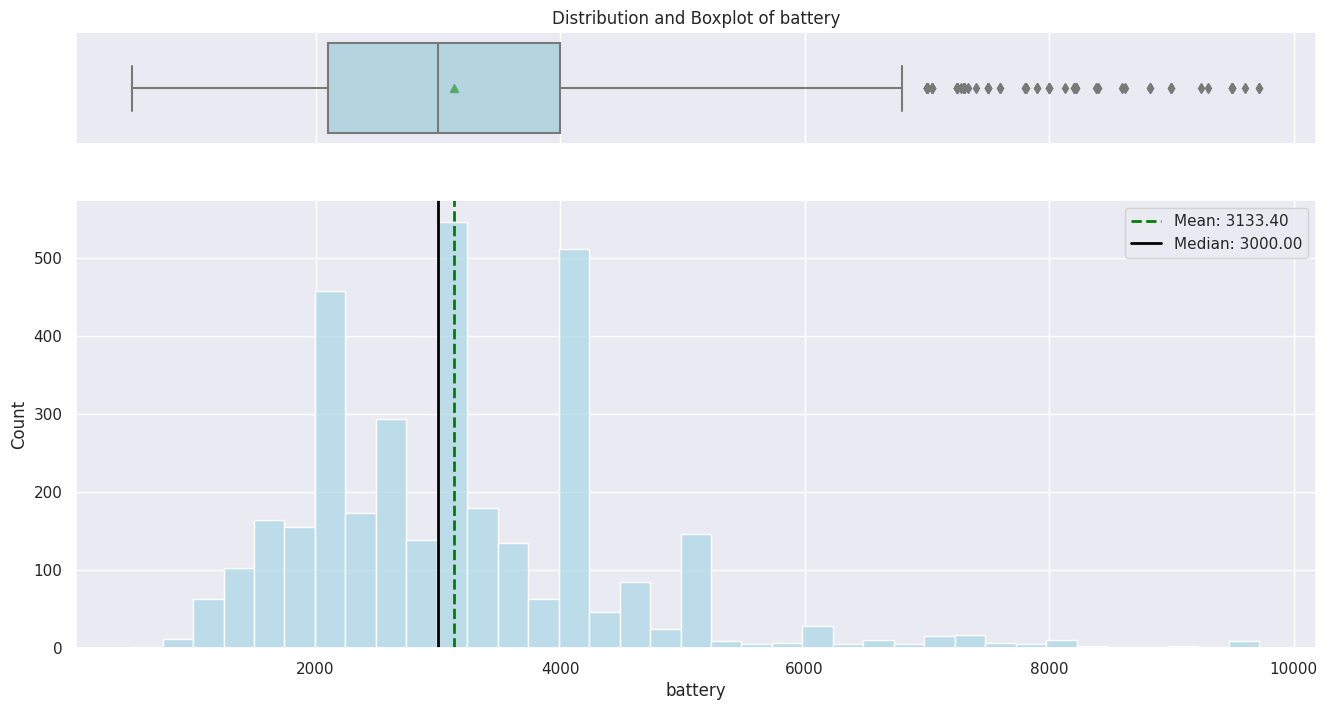

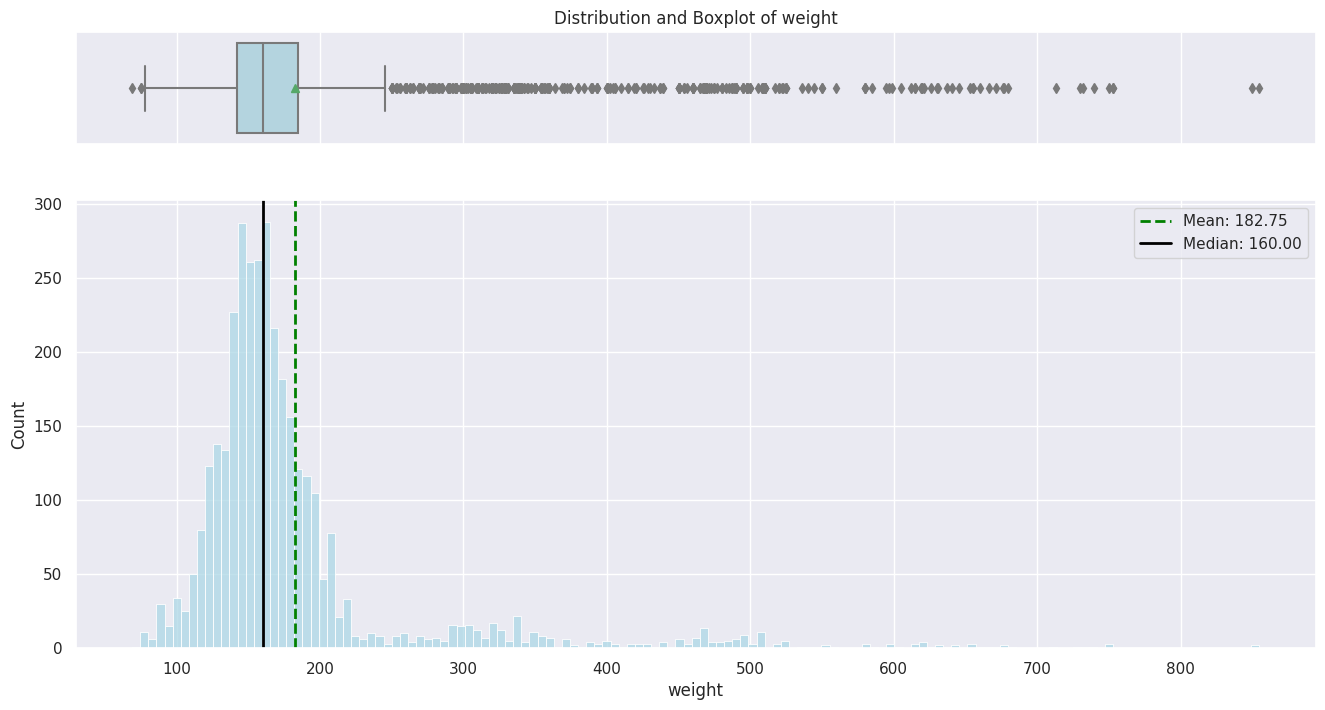

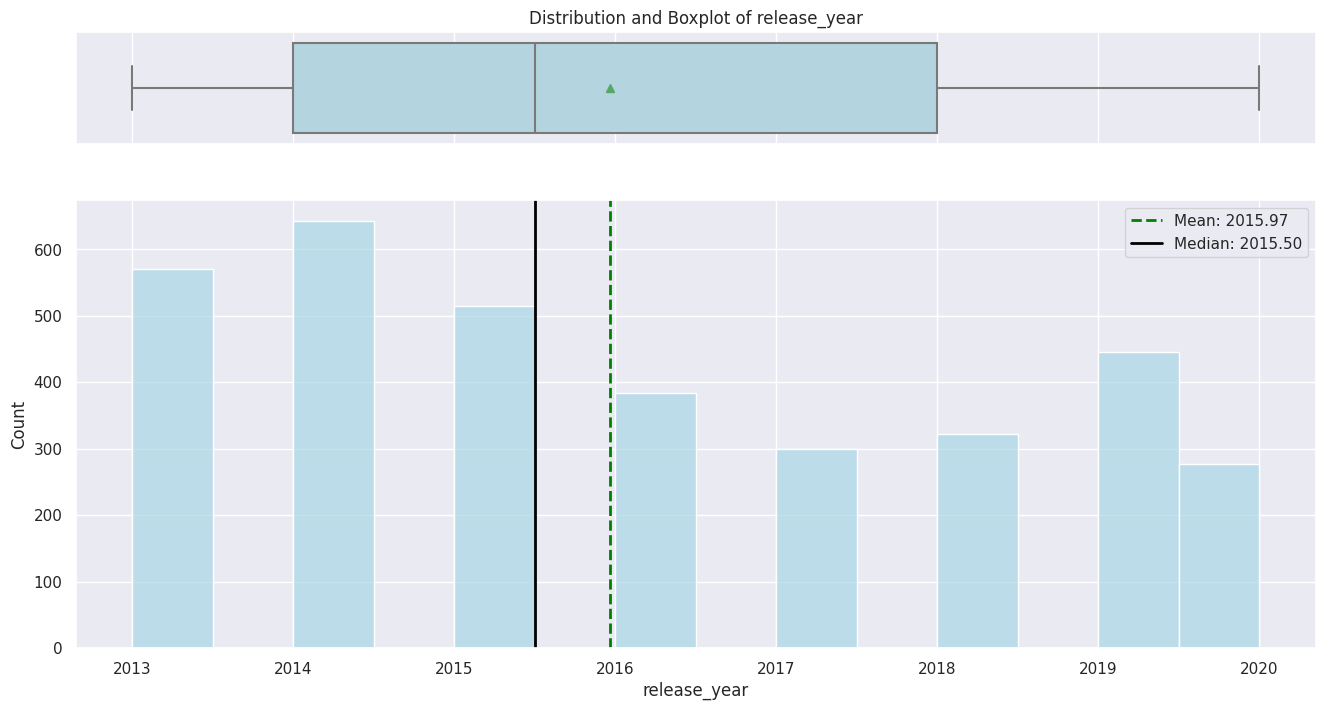

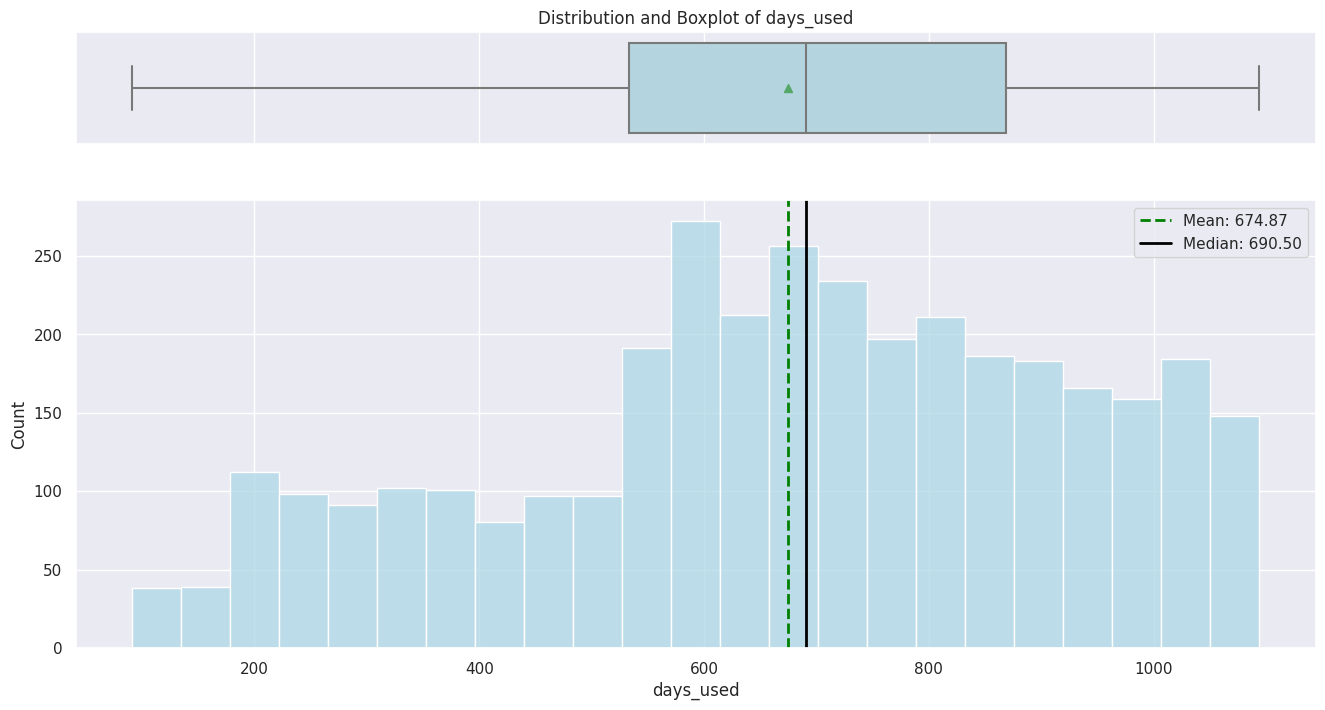

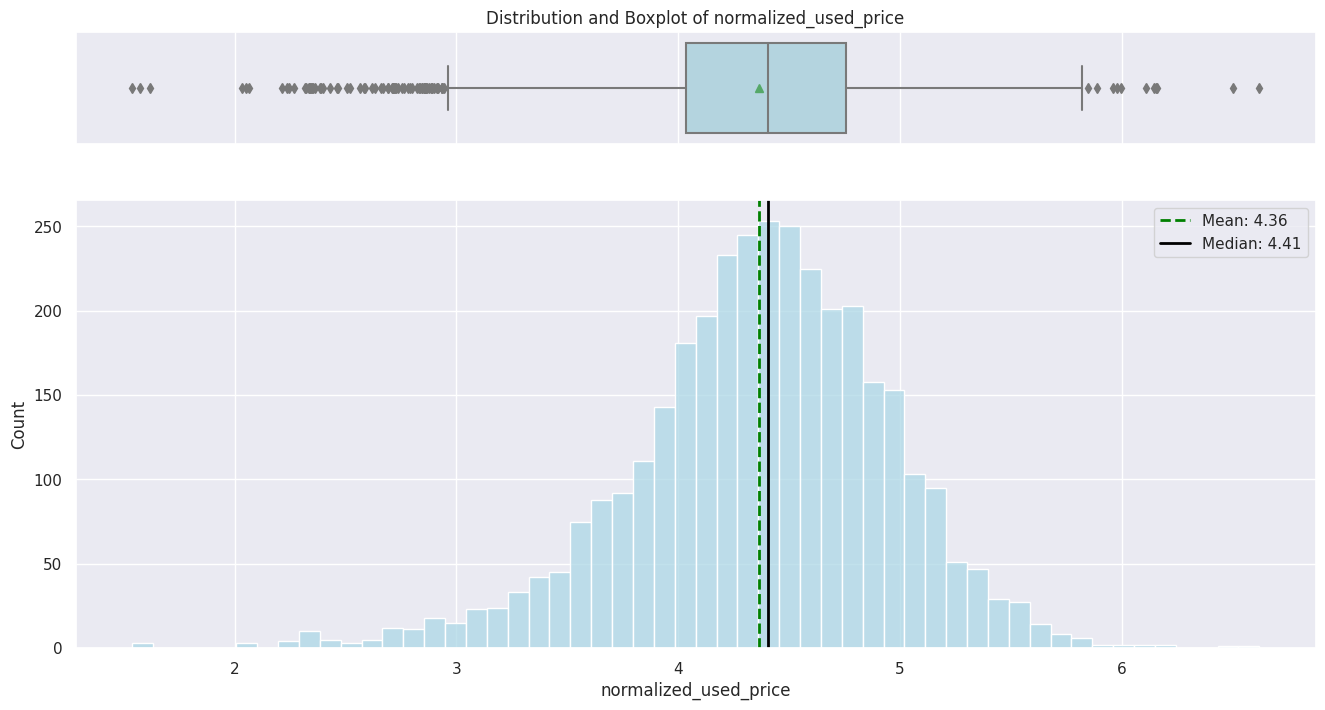

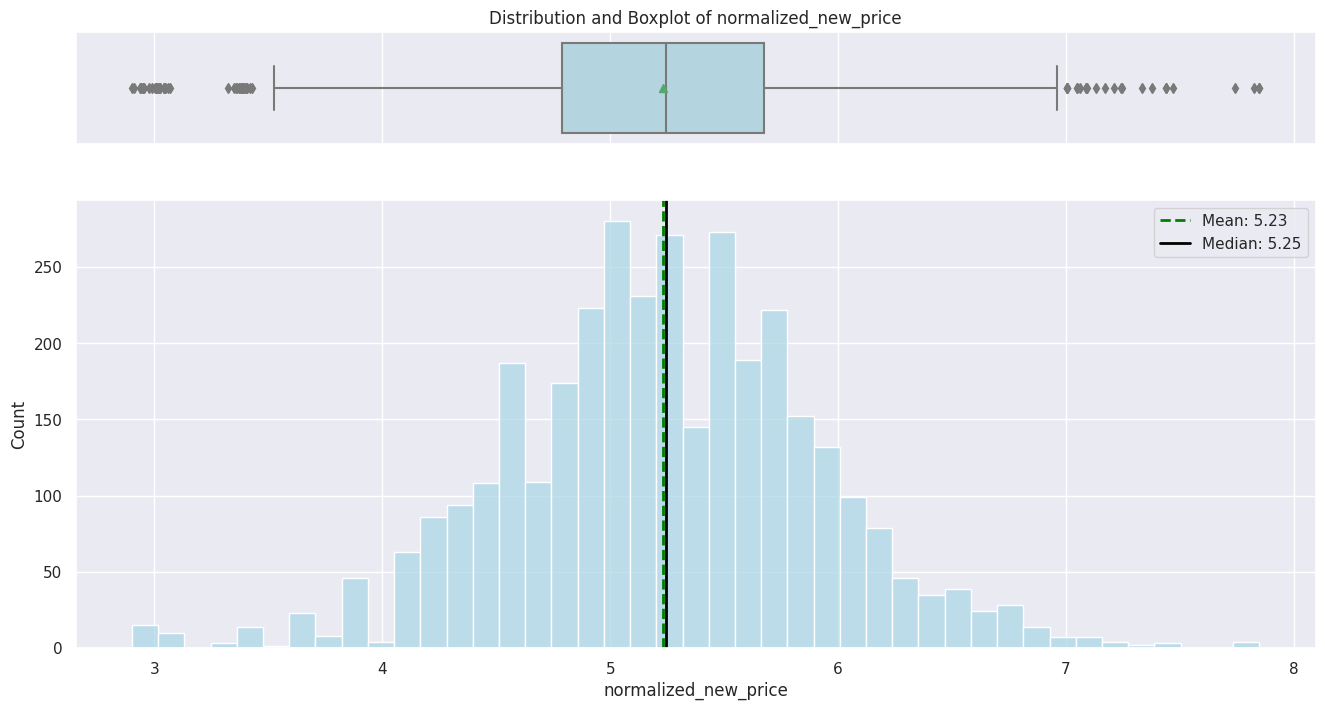

In [ ]:
# List of all numerical variables in the df_eda DataFrame
numerical_variables = [
    'screen_size',
    'main_camera_mp',
    'selfie_camera_mp',
    'int_memory',
    'ram',
    'battery',
    'weight',
    'release_year',
    'days_used',
    'normalized_used_price',
    'normalized_new_price'
]

# Looping through the list and creating a histogram and boxplot for each variable
for variable in numerical_variables:
    plot_hist_and_box(df_eda, variable)

Review:

Central Tendency: The green dashed line (mean) and the black solid line (median) indicate the central tendency of the distribution.

Spread: The width of the box in the boxplot indicates the interquartile range (IQR), giving an idea of how spread out the middle 50% of the data is.

Outliers: Data points that lie significantly outside the main distribution, potentially indicating very high or very low prices compared to the majority.

Distribution Shape: The histogram, combined with the KDE curve, shows the shape of the distribution. If the distribution is bell-shaped, it's close to normal; otherwise, it may show skewness or multi-modality (multiple peaks).

---

Observations:

**`screen_size`:**
* Concentration around 14-15 cm suggests a common standard.
* The right skew indicates non-linearity; may require transformation for linear modeling.

**`main_camera_mp`:**
* High concentration in lower megapixels, fewer high-megapixel devices.
* Consider binning or transforming for linear models to handle the right skew

**`selfie_camera_mp:`**
* Lower-end specs are more common, with occasional high-end specs.
* Outliers may need to be addressed to meet linear regression's normality assumption.

**`int_memory:`**
* Devices with higher memory are less common.
* A non-linear transformation or categorization could be beneficial for modeling.

**`ram:`**
* Mainly concentrated around a single value (already identified to be 4g).
* Low variance in RAM may not significantly contribute to a linear model's predictive power.

**`battery:`**
* Right-skewed distribution with some high-capacity outliers.
* Transformation or outlier treatment may be required to ensure homoscedasticity in residuals.

**`weight:`**

* Most devices are lighter, with a right skew indicating some heavier models like tablets.
* Skewness may indicate the need for data transformation to meet linearity assumptions.

**`release_year:`**
* Steady release frequency over time without significant outliers.
* Temporal data may need to be handled carefully to avoid introducing multicollinearity.

**`days_used:`**
* Symmetrical distribution around the median.
* Normality in distribution suggests no transformation needed for this feature for linear regression.

**`normalized_used_price:`**
* Fairly symmetrical, bell-shaped distribution.
* Normal distribution of target variable supports linear regression assumptions.

**`normalized_new_price:`**
* Presence of outliers indicates variation in new device pricing.
* Outlier management may be necessary to avoid undue influence on the regression model.

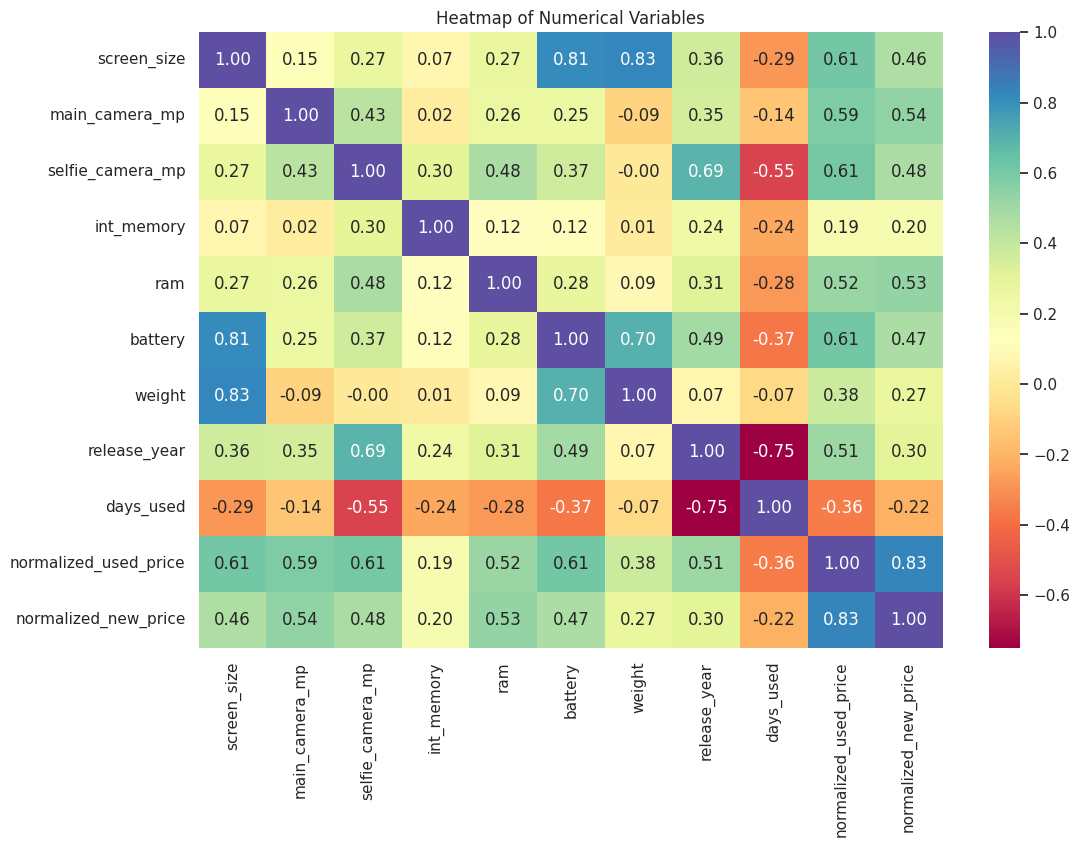

In [9]:
# Creating a heatmap for the numerical variables in the dataframe
numeric_df_eda = df_eda.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df_eda.corr(), annot=True, cmap='Spectral', fmt=".2f")
plt.title("Heatmap of Numerical Variables")
plt.show()

Observations:

_Strong positive correlation is anything greater than .68_

* `battery` and `weight` have strong positive correlations with each other (.70).
*  `battery`(.81) and `weight`(.83) have an almost equal strong positive correlation with `screen_size`.
* `screen_size`,`battery`and `selfie_camera_mp` have identical positive correlation with target variable (.61)
* `weight`(.38) has a less pronounced direct correlation with target.

Given their strong correlations with the target variable, `battery` and `screen_size` should be considered for inclusion in the model. The lower correlation of `weight` with the target probably means less utility as a predictor, as well as multicolinearity, since it carries similar information as `battery`.

* There is a strong positive correlation between `normalized_used_price` and `normalized_new_price`, suggesting that the original price of a device is a strong predictor of its second-hand price.

* The target variable has notable positive correlations with `main_camera_mp`,`release_year`, and `ram`, indicating these features are good predictors of the used device price.

* `release_year` has a strong negative correlation with `days_used`, which is logical as newer devices will have been used for fewer days.

* `days_used` and has a negative correlation with `normalized_used_price` and `normalized_new_price`, indicating that as the number of days a device has been used increases, its price (both used and new) tends to decrease.

Multicolinearity Plan:

* Variance Inflation Factor (VIF) analysis to asses the extent of multicolinearity between independent variable features before removing or altering them.
* Dimentionality reduction such as Principal Component Analysis (PCA), Ridge (L2 regularization) or Lasso (L1) regularization.

#### Categorical Variables

In [ ]:
def custom_barplot(df_eda, column, show_perc=False, top_n=None):
    """
    Creates a bar plot with labels for each bar from the dataframe df_eda.

    Args:
    - df_eda: The DataFrame containing the data.
    - column: The column name to plot.
    - show_perc: A boolean to indicate whether to display the percentage (True) or count (False).
    - top_n: An integer to display only the top N categories, or None to display all.

    Returns:
    None
    """
    total_entries = len(df_eda[column])  # The total number of entries
    category_counts = df_eda[column].value_counts()

    # Determine the figure size based on the number of categories
    fig_width = top_n + 2 if top_n is not None else category_counts.size + 2
    plt.figure(figsize=(fig_width, 6))

    # Create the bar plot
    category_order = category_counts.index[:top_n] if top_n is not None else category_counts.index
    barplot = sns.countplot(x=column, data=df_eda, order=category_order, palette='pastel')

    # Add labels to each bar
    for bar in barplot.patches:
        label_x_pos = bar.get_x() + bar.get_width() / 2
        if show_perc:
            label = f"{100 * bar.get_height() / total_entries:.1f}%"
        else:
            label = f"{bar.get_height()}"
        barplot.annotate(
            label,
            (label_x_pos, bar.get_height()),
            ha='center',
            va='bottom',
            fontsize=12,
            textcoords='offset points',
            xytext=(0, 10)
        )

    # Rotate x-axis labels if there are many categories
    if category_counts.size > 10:
        plt.xticks(rotation=45, ha='right')

    plt.show()


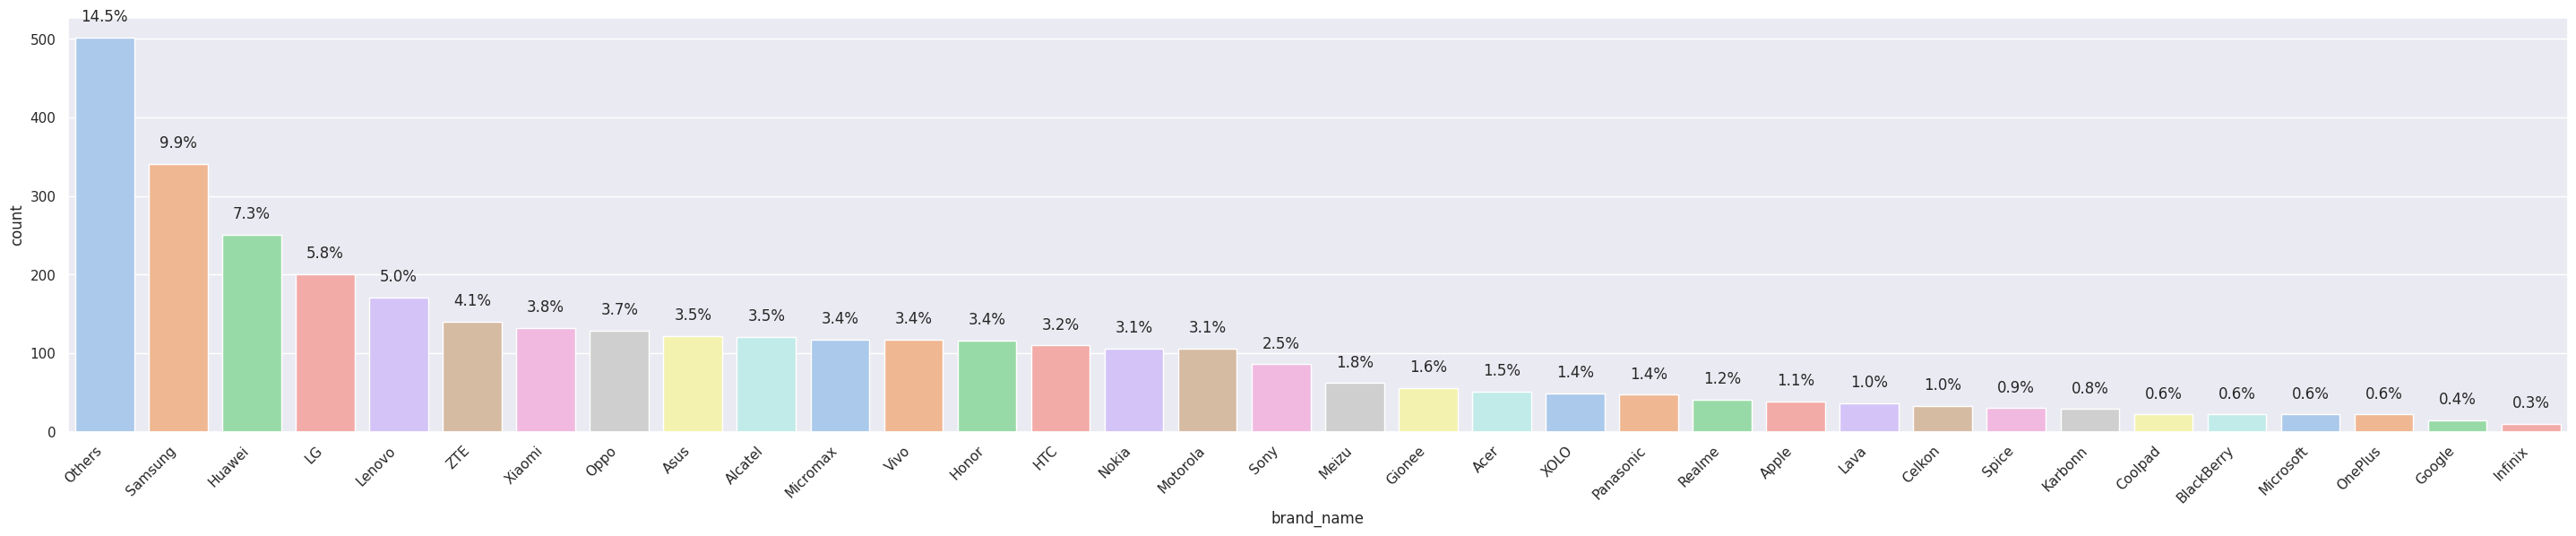

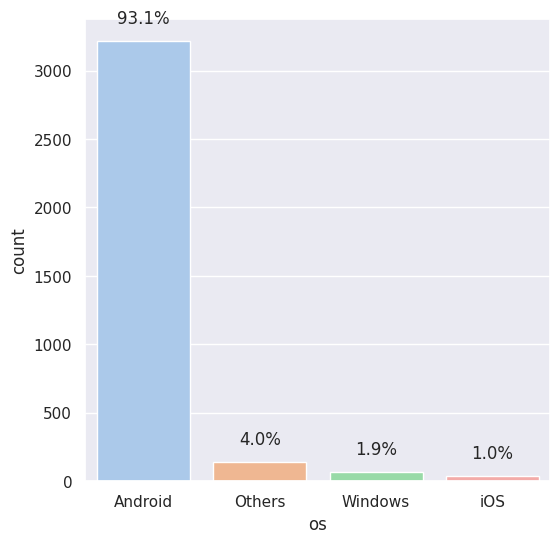

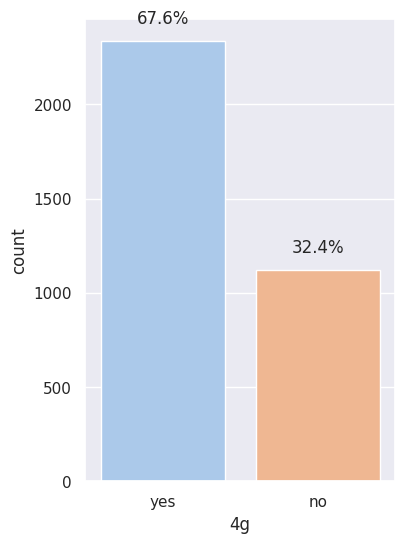

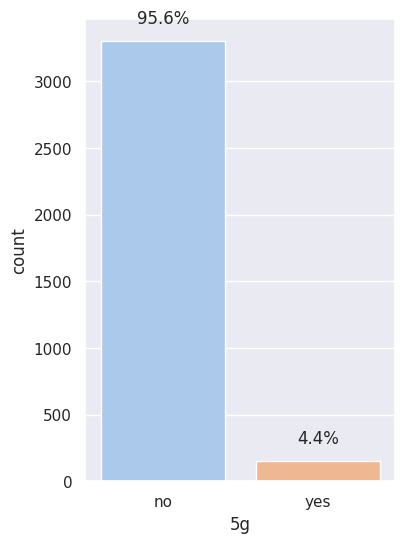

In [ ]:
# List of categorical variables in the df_eda DataFrame
categorical_variables = ['brand_name', 'os', '4g', '5g']

# Looping through the list and creating a labeled barplot for each variable
for variable in categorical_variables:
    custom_barplot(df_eda, variable, show_perc=True)

**`brand_name:`**
*  Others category is quite large, indicating a diverse range of brands.
* Samsung, being one of the leading brands, has a significant presence in the dataset thus model will show stronger predictive power for Samsung.
* The long tail of brands with smaller representations such as Apple is intresting and presents a predictive challenge and overfitting for those brands due to few data.
* Consider aggregating the less common brands.


**`os:`**
* Dominated by Android, representing a significant majority of the dataset.
* The skew towards Android may limit the model's ability to assess the OS impact on pricing. Stratification or combining OS categories might be necessary for model training.

**`4g:`**
* Majority of devices are 4g-enabled, indicating a standard feature expectation in the market.
* However, because 4g is the common feature of most of the data it doesn't significantly differentiate prices among used devices.

**`5g:`**
* 5g phones have limited datapoints in the dataset.
* Implications if imbalanced data: statistical significance, overfitting, data representation.


### Bivariate Analysis

#### `1.` Distribution of Normalized Used Device Prices


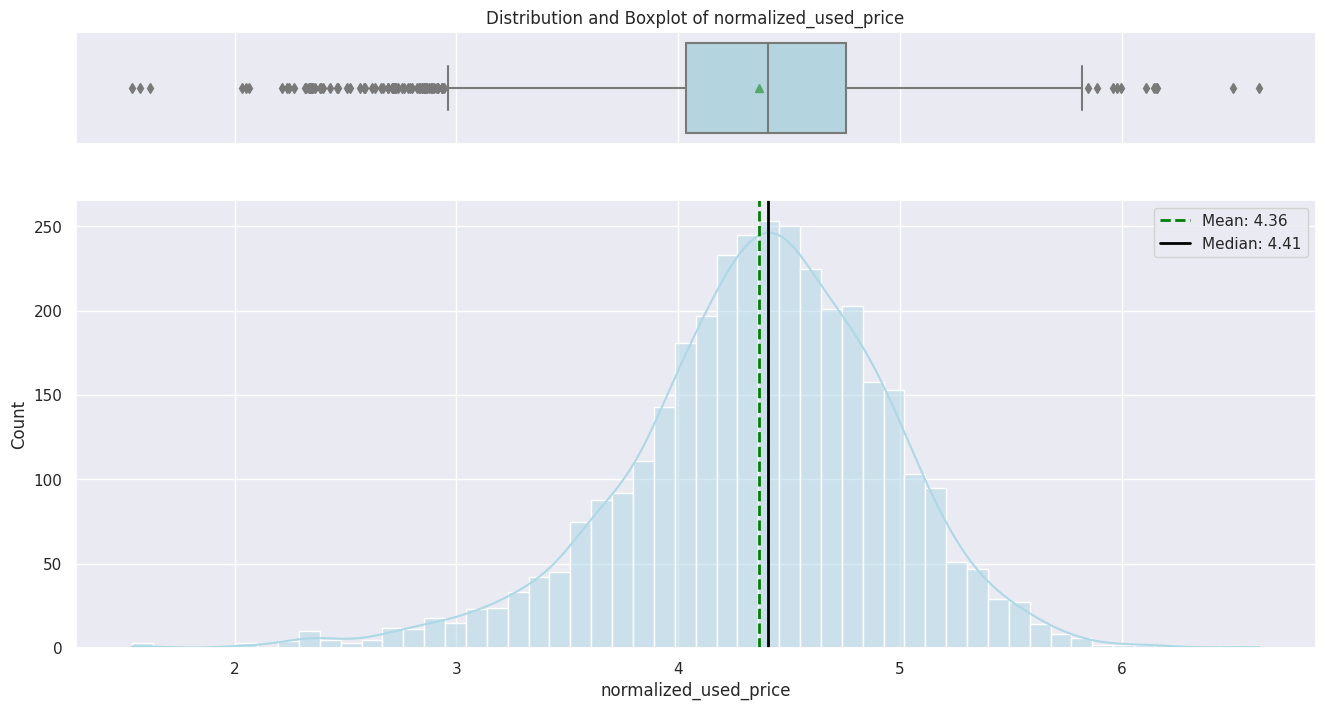

In [ ]:
# Visualization using histogram_boxplot function
plot_hist_and_box(df_eda, "normalized_used_price", density_curve=True) # aka KDE

Observations:
* Symmetrical, bell-shaped distribution.
* Normal distribution of target variable supports linear regression assumptions.
* There are some outliers but they are symetrical on both sides and thus will leave untreted.

#### `2.` Percentage of the Used Device Market Dominated by Android Devices

In [ ]:
android_market_share = (df_eda['os'] == 'Android').sum() / len(df_eda) * 100
print(f"Percentage of Android devices in the market: {android_market_share:.2f}%")

Percentage of Android devices in the market: 93.05%


#### `3.`Variation of RAM with Brand

Observations:
* We have already observed that Android is the dominant operating system.

* Using one-hot encoding might not be the most efficient approach. Instead, a binary encoding where Android is one category and all other os's are another can be done.

* With such a high proportion of Android devices, there's a risk that the model will be biased towards predicting outcomes for Android devices more accurately than for others.
* Given the dominance of Android, the 'os' feature might not be very discriminative for the model.

*  There might be interaction effects between 'os' and other features. For instance, certain features might have different impacts on the price or other target variables depending on whether the device is Android or not.

* The dominance makes underfit is likely, especially when predicting outcomes for non-Android devices.



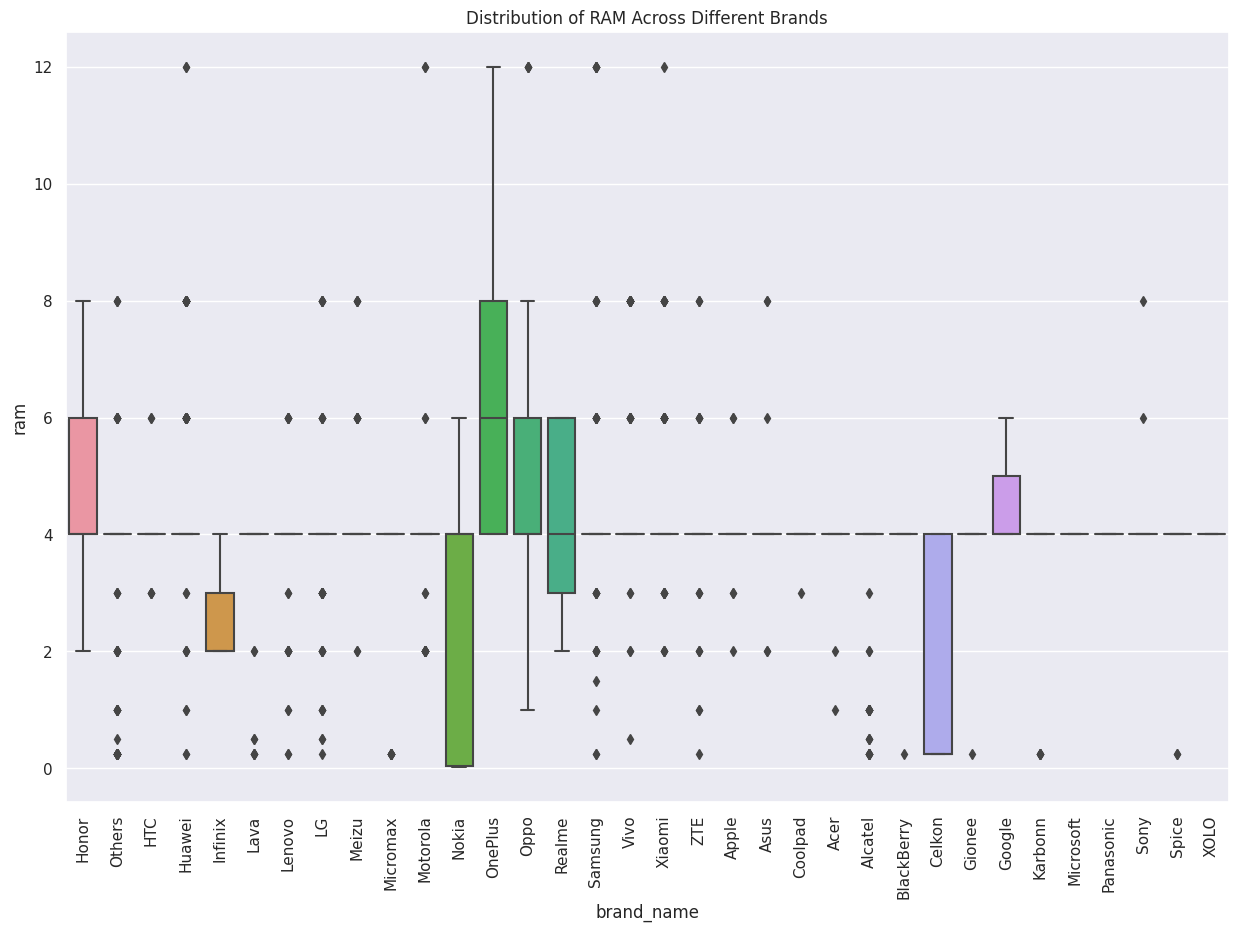

In [ ]:
# Visualization using a boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_eda, x='brand_name', y='ram')
plt.xticks(rotation=90)
plt.title("Distribution of RAM Across Different Brands")
plt.show()


Observations:

* Outliers: Several brands show outliers in their RAM capacities. This could indicate either special edition models with unusually high or low RAM or data entry errors.
* Skewed Distributions: Some brands exhibit skewed distributions, either towards the lower or higher end of the RAM scale. This skewness should be considered during data preprocessing, especially if RAM is a significant feature in the predictive modeling.
* Normalization/Standardization: Normalization or standardization might be necessary to bring this feature onto the same scale as others, especially considering the wide range of values and outliers.


#### `4.` Weight Variation for Devices with Large Batteries


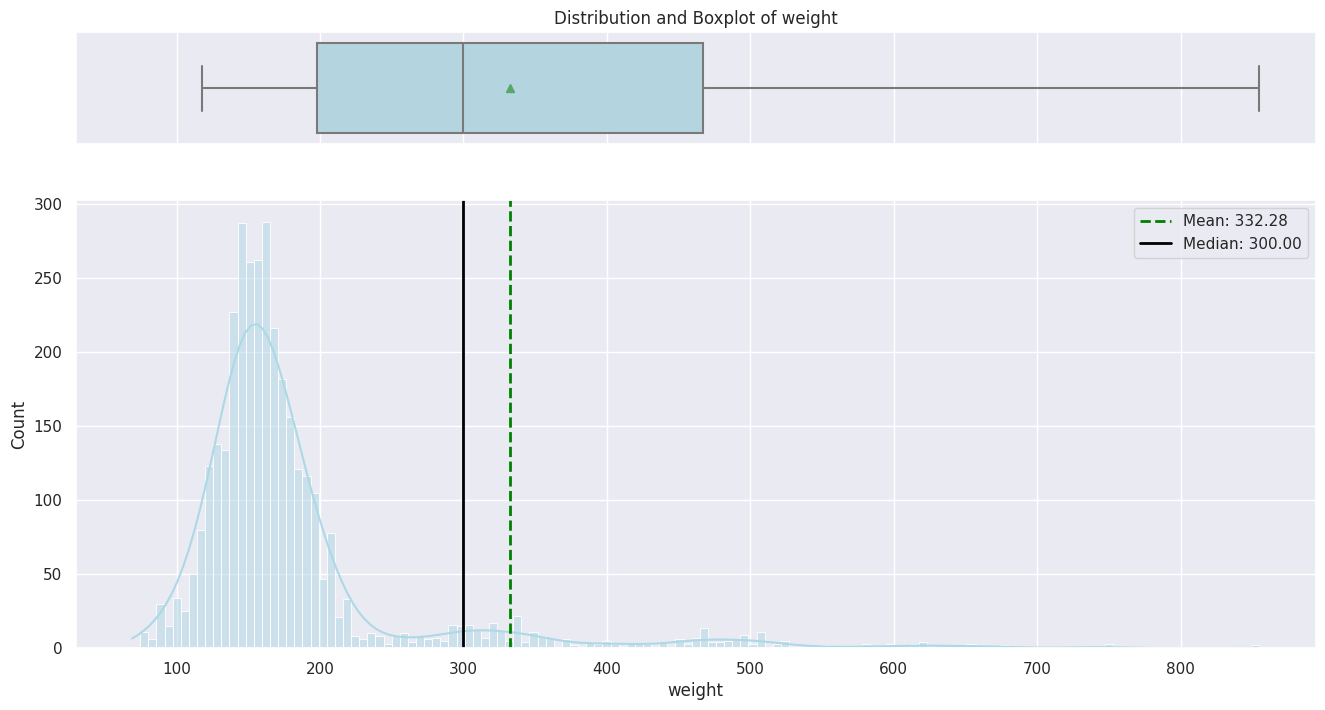

In [ ]:
# Filter devices with battery more than 4500 mAh
large_battery_devices = df_eda[df_eda['battery'] > 4500]

# Visualization using plot_hist_and_box( function
plot_hist_and_box(large_battery_devices, "weight", density_curve=True)

Observations:
* The weight data shows a slight right skew, hinting at a need for transformation to achieve normality for linear regression.

* A few significantly heavy devices are present. These outliers should be examined to decide if they should be kept, adjusted, or removed to prevent skewing the model.

* The strong correlation between `weight` and `battery` size frmo the heatmap also further suggests that including an interaction term between these two features should be considered.

#### `5.` Availability of Large Screen Devices Across Brands


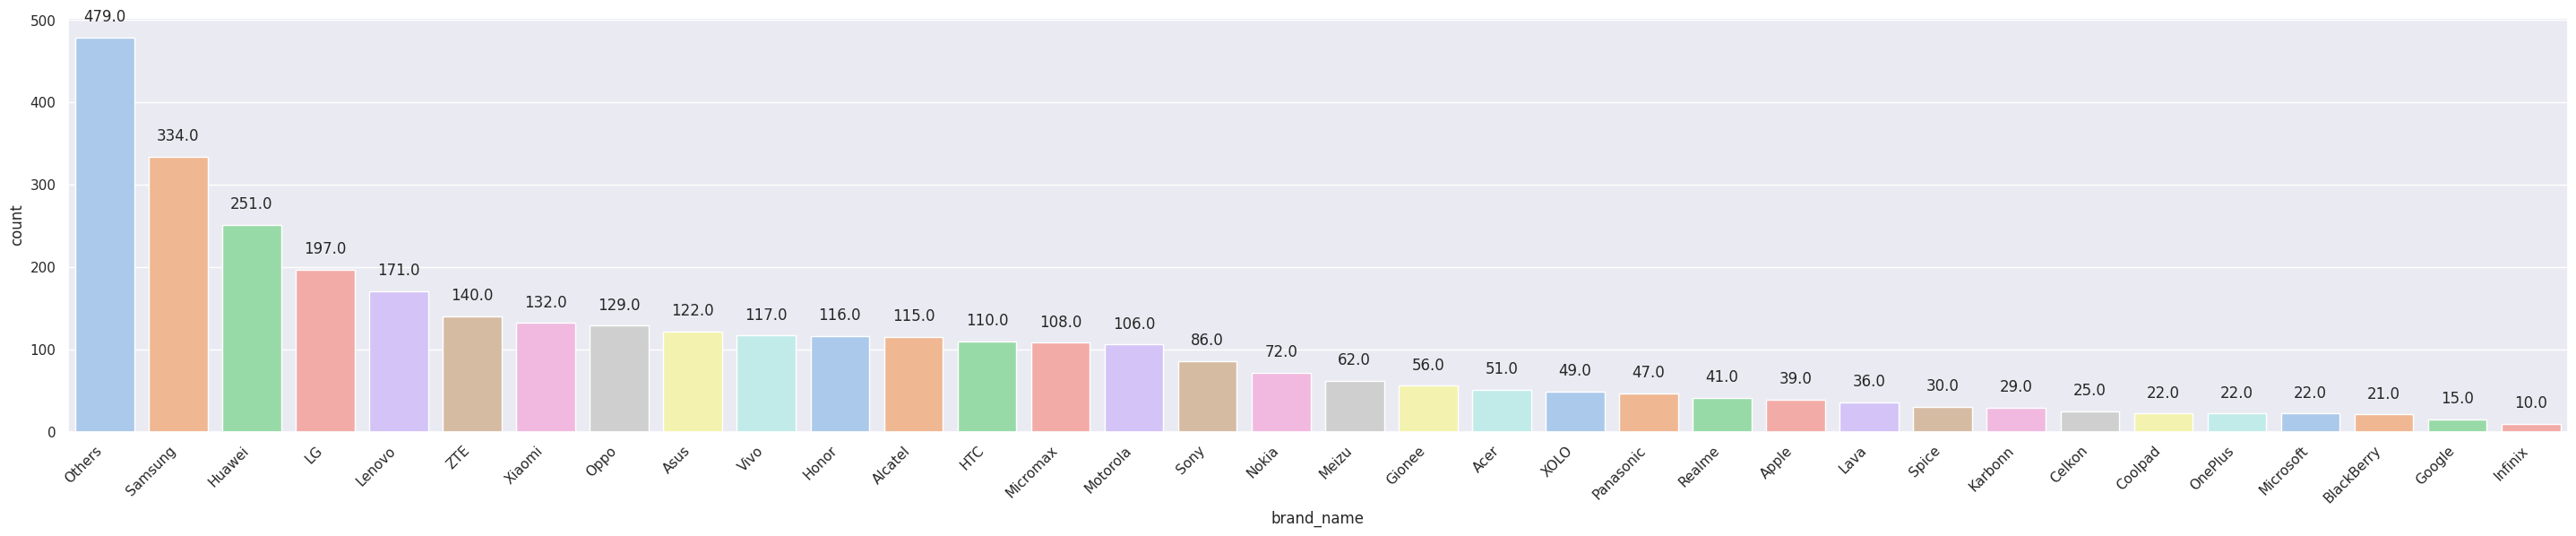

In [ ]:
# Filter devices with screen size larger than 6 inches
large_screen_devices = df_eda[df_eda['screen_size'] > 6]

# Visualization using custom_barplot function
custom_barplot(large_screen_devices, "brand_name", show_perc=False)


Initial EDA Insights:

* Brand Diversity: The "Others" category leads by a significant margin, suggesting that there is a wide variety of less common brands that offer large-screen devices. This indicates a fragmented market with many players.

Market Leaders: Samsung, Huawei, and LG follow as the top individual brands, implying they have a substantial offering of large-screen devices in the used device market.

Potential Influence on Pricing: Screen size is likely a significant factor in determining the price of used devices. So, once encoded look into this correlation before preprocessing or transforming `brand_name`.


#### `6.`Distribution of Devices with >8MP Selfie Cameras Across Brands


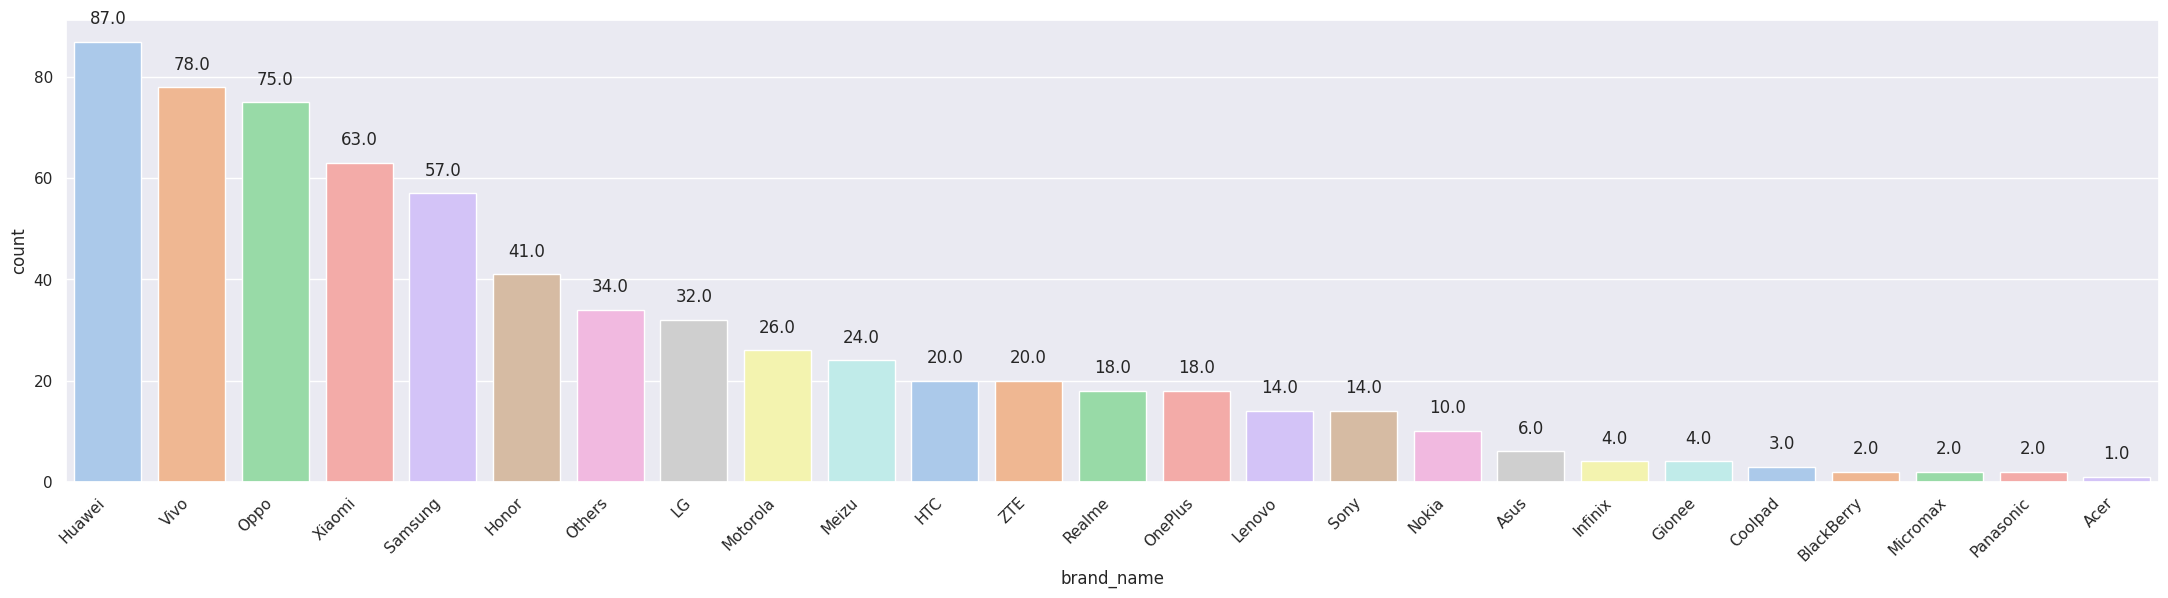

In [ ]:
# Filter devices with selfie camera greater than 8MP
high_res_selfie_devices = df_eda[df_eda['selfie_camera_mp'] > 8]

# Visualization using custom_barplot function
custom_barplot(high_res_selfie_devices, "brand_name", show_perc=False)


Observations:
* Huawei leads the count for devices with selfie cameras greater than 8MP
* Vivo and Oppo also have a significant number of devices with high-res selfie cameras, which may reflect their marketing focus on camera capabilities as a key selling point.
* The presence of multiple brands (including market leaders like Samsung), suggests a trend towards smartphones equipped to cater to the selfie-taking.
---

Compare these brands on other features to see if high-resolution selfie cameras are part of a broader trend.

Consider this informaiton in relation to "Other" category when normalizing it.

Consider engineering a price-to-feature ratio that includes factors like screen_size, camera_resolution, camera_style and other specifications relative to the price.


#### `7.` Distribution of Devices with >16MP Rear Cameras Across Brands



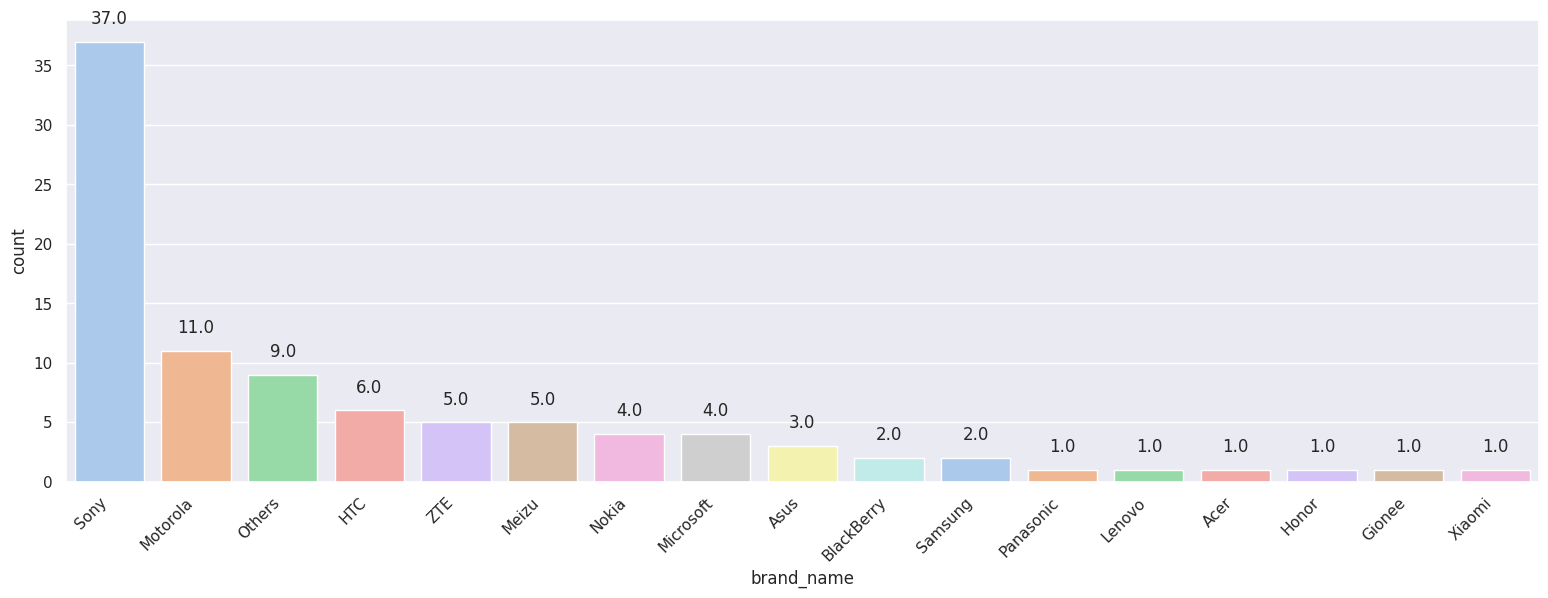

In [ ]:
# Filter devices with rear camera greater than 16MP (setting threshold higher becasue rear cameras have higher res)
rear_main_mp = df_eda[df_eda['main_camera_mp'] > 16]

# Visualization using custom_barplot function
custom_barplot(rear_main_mp, "brand_name", show_perc=False)

Observations:
* Sony leads the brand distribution with high-resolution cameras in their devices. This could influence the model as these devices may attract premium pricing in the used market.
* The "Others" category has fewer devices with high-resolution cameras compared to the bar chart for large screens or high-resolution selfie cameras, possibly indicating less emphasis on high-resolution rear cameras in less popular brands or older models.



#### `8.` Attributes Highly Correlated with the Normalized Price of a Used Device

In [ ]:
# Correlation matrix
correlation_matrix = df_eda.corr(numeric_only=True)
# Correlation with 'normalized_used_price'
correlation_with_price = correlation_matrix["normalized_used_price"].sort_values(ascending=False)

print(correlation_with_price)

normalized_used_price    1.000000
normalized_new_price     0.834496
screen_size              0.614785
battery                  0.613619
selfie_camera_mp         0.608074
main_camera_mp           0.587302
ram                      0.520289
release_year             0.509790
weight                   0.382354
int_memory               0.190993
days_used               -0.358264
Name: normalized_used_price, dtype: float64


Observations:

Correlation coefficients between features and the the target variable,  normalized_used_price.

**Strong Positive Correlation** with `normalized_new_price`:

* This indicates that the price of a device when new is strongly associated with its price on the used market.

**Moderate to Strong Correlations** with Features like `screen_size`, `battery`, `selfie_camera_mp`, `main_camera_mp`, `ram`, and `release_year`
* Screen Size: Larger screens may contribute to a higher resale value.
* Battery: Larger battery capacity seems to positively impact used device prices.

* Selfie and Main Camera mp: Higher camera quality appears to be an important factor in the used device's value.

* RAM: More RAM is associated with higher used device prices, indicating its importance for device performance.
* Release Year: Newer models tend to have higher used market prices, reflecting newer technology and features.

**Lower Positive Correlation** with `weight` and `int_memory`:

* Weight: Slightly positively correlated, suggesting that heavier devices might be priced a bit higher, possibly due to larger screens or batteries.

* Internal Memory: Lower correlation suggests that while internal memory size has some impact on price, it may not be as significant as other features.

**Negative Correlation** with days_used:

* The longer a device has been used, the lower its price tends to be in the used device market. This reflects the depreciation factor which must be included in the model either as is or through feature engineering.



** Price of Used Devices over Time**

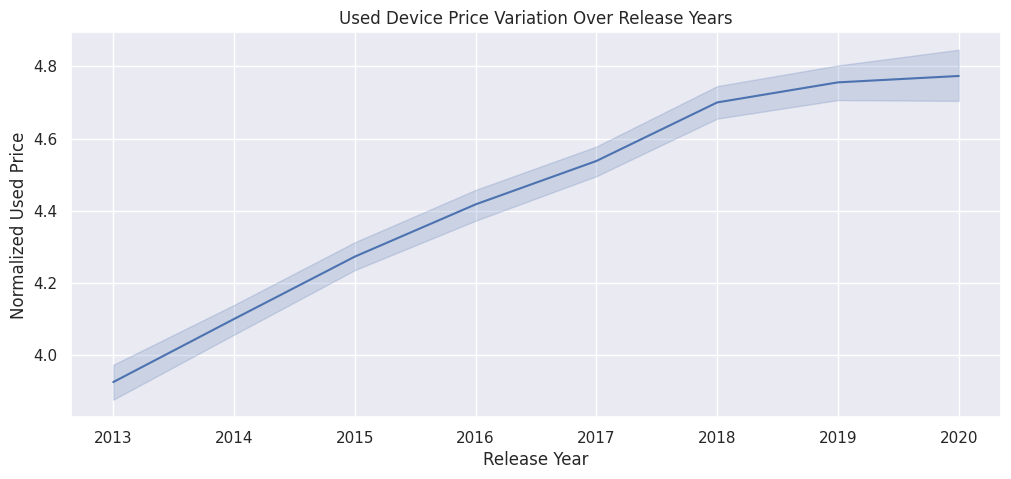

In [ ]:
# create a lineplot for release year and used price
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_eda, x='release_year', y='normalized_used_price')
plt.title("Used Device Price Variation Over Release Years")
plt.xlabel("Release Year")
plt.ylabel("Normalized Used Price")
plt.show()

Observations:
* Positive Trend: the more recently released devices have higher used prices.
* Diminishing Rate of Increase: The slope of the line seems to be getting flatter as time progresses.


**Price Varience for Used Devices Offering 4G and 5G networks.**

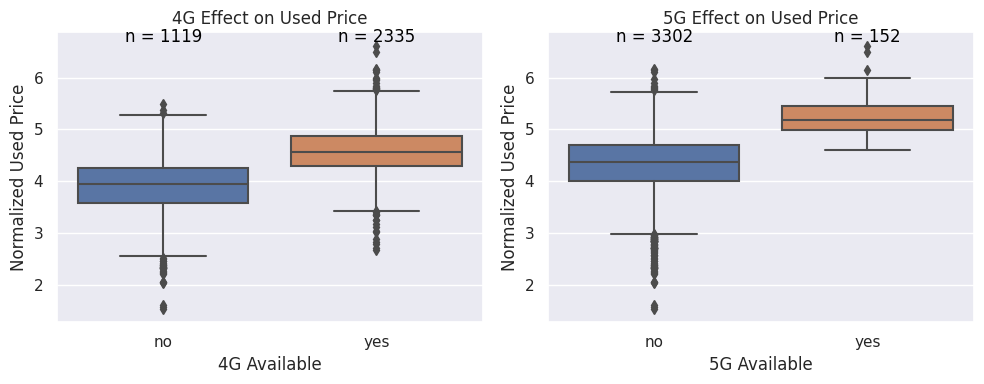

In [ ]:
plt.figure(figsize=(10, 4))

# Boxplot for 4G availability against normalized used price
plt.subplot(121)
sns.boxplot(data=df_eda, x="4g", y="normalized_used_price", order=["no", "yes"])
plt.title('4G Effect on Used Price')
plt.xlabel('4G Available')
plt.ylabel('Normalized Used Price')

# Add count above the 4G boxplot
counts_4g = df_eda['4g'].value_counts().sort_index()
for i, value in enumerate(["no", "yes"]):
    plt.text(i, df_eda["normalized_used_price"].max(), f'n = {counts_4g[value]}', ha='center', va='bottom', color='black')

# Boxplot for 5G availability against normalized used price
plt.subplot(122)
sns.boxplot(data=df_eda, x="5g", y="normalized_used_price", order=["no", "yes"])
plt.title('5G Effect on Used Price')
plt.xlabel('5G Available')
plt.ylabel('Normalized Used Price')

# Add count above the 5G boxplot
counts_5g = df_eda['5g'].value_counts().sort_index()
for i, value in enumerate(["no", "yes"]):
    plt.text(i, df_eda["normalized_used_price"].max(), f'n = {counts_5g[value]}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

Observations:

**4G Availability:**
* A significant majority of devices (2335 out of 3454) have 4g capabilities.
* Devices with 4g seem to have a slightly higher median price compared to those without. However, the range of prices is similar between them.
* There are outliers on both ends for devices with 4g, indicating that there are both very high and very low prices that deviate from the norm.

**5G Availability:**
*  Only a small portion of the dataset (152 out of 3454) has 5g capabilities, meaning 5g is less common in the dataset.

* The imbalance in the number of devices with and without 5g needs to be considered when building predictive models, as the model will have fewer examples to learn from for the 'yes' class in 5g.



## Data Preprocessing

Make a copy of the analyzed data before preprocessing for safety net reasons since this step includes handling missing values, dealing with outliers, encoding categorical variables, feature scalin etc. In case of a a mistake during preprocessing or decide to try a different preprocessing strategy, this avoids having to redo the initial EDA and just make another copy of it to proceed.

In [35]:
# make a copy of the df_eda because Preprocessing will fundamentally change the raw already analyzed data
df_preprocess = df_eda.copy()

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)
Scaling and normalizing data.

### Missing Value Imputation

Impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.
Imputing missing values by considering the brand and release year helps fill in gaps with numbers that are typical for phones from a specific time and manufacturer.

In [36]:
#Group-wise imputation
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
# impute missing values in cols_impute with median by grouping the data on release_year and brand_name
for col in cols_impute:
    df_preprocess[col] = df_preprocess[col].fillna(
        value=df_preprocess.groupby(['release_year', 'brand_name'])[col].transform("median")
    )

# check missing values after imputing the above columns
df_preprocess.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations:
* Not all missing values went away after group-wise imputation by 'release_year' and 'brand_name', there could be a few reasons (insufficient data for groups, data distribution etc.) So, broaden the grouping criteria by 'brand_name' only.

In [37]:
#Overall column median by brand imputation
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

# impute the missing values in cols_impute with median by grouping the data on brand name
for col in cols_impute:
    df_preprocess[col] = df_preprocess[col].fillna(
        value=df_preprocess.groupby(['brand_name'])[col].transform("median")
    )

# check missing values after imputing the above columns
df_preprocess.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

Observations:
* Fill the remaining missing values in the `main_camera_mp` column by the column median.

In [38]:
# Complete the code to impute the data with median
df_preprocess['main_camera_mp'] = df_preprocess['main_camera_mp'].fillna(df_preprocess['main_camera_mp'].median())

## check missing values after imputing the above columns
df_preprocess.isnull().sum()


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

Transform the release_year into a more directly relevant feature like years_since_release to make the data more intuitive. Instead of just the release year, this creates a direct measure of device age, which is easier to relate to and use in analysis.

In [39]:
df_preprocess["years_since_release"] = 2021 - df_preprocess["release_year"]
df_preprocess.drop("release_year", axis=1, inplace=True)
df_preprocess["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

Summary of years_since_release:
* Count: Indicates that this new feature has been successfully created for all rows in the dataset and there are no missing values, (3454).
* Mean: On average, the devices in the dataset are about 5 years old.
* Standard Deviation: Shows moderate variability in the age of the devices.
* Median: Half of the devices are more than 5.5 years old, and half are less.
* Device Age Distribution: The dataset contains a range of device ages, from fairly new (1 year old) to relatively old (8 years).


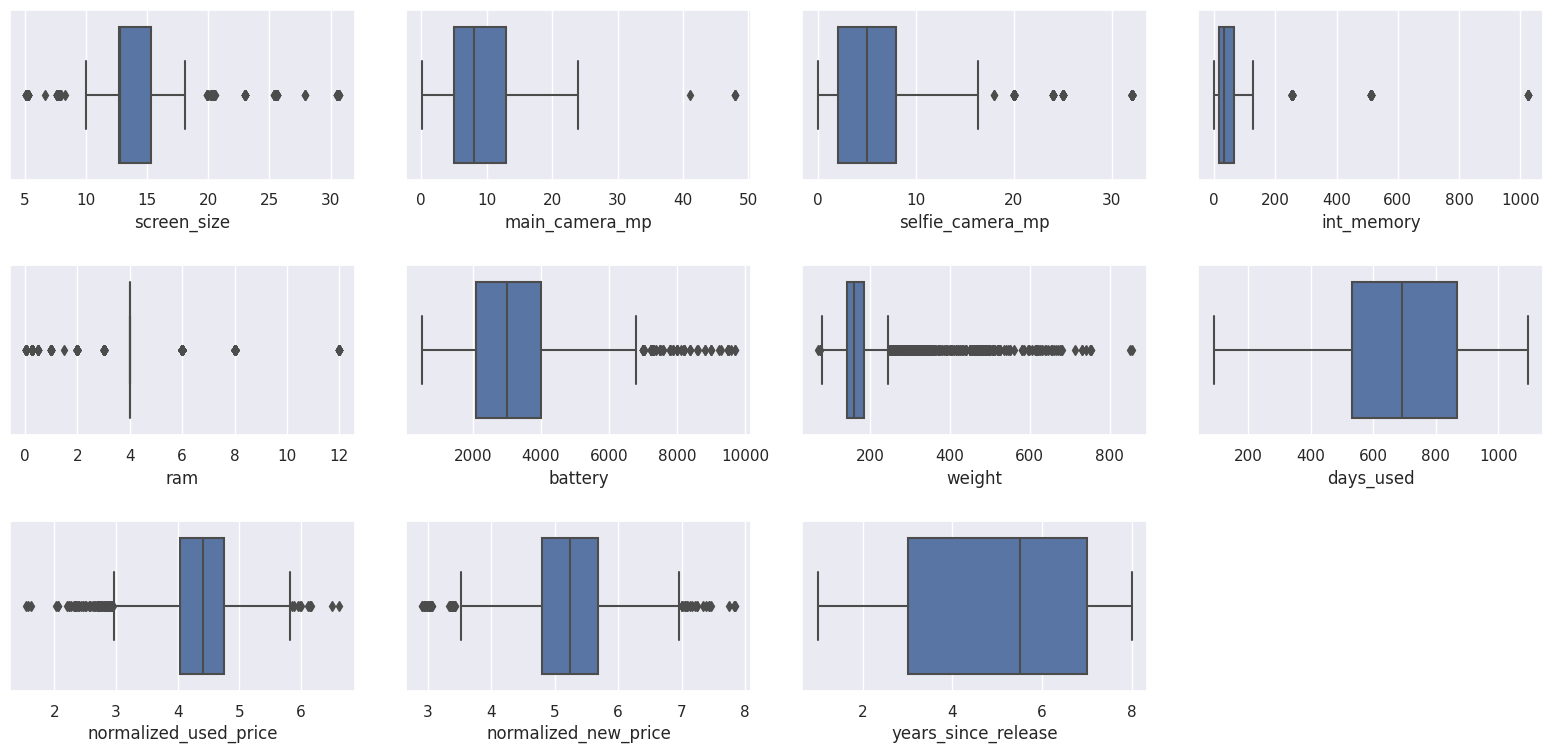

In [ ]:
# outlier detection using boxplot
num_cols = df_preprocess.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(16, 8))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_preprocess, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [40]:
# Columns specified for log transformation
cols_to_log = ["normalized_new_price", "normalized_used_price", "weight"]

# Applying log transformation directly to the original columns
for col in cols_to_log:
    df_preprocess[col] = np.log(df_preprocess[col])


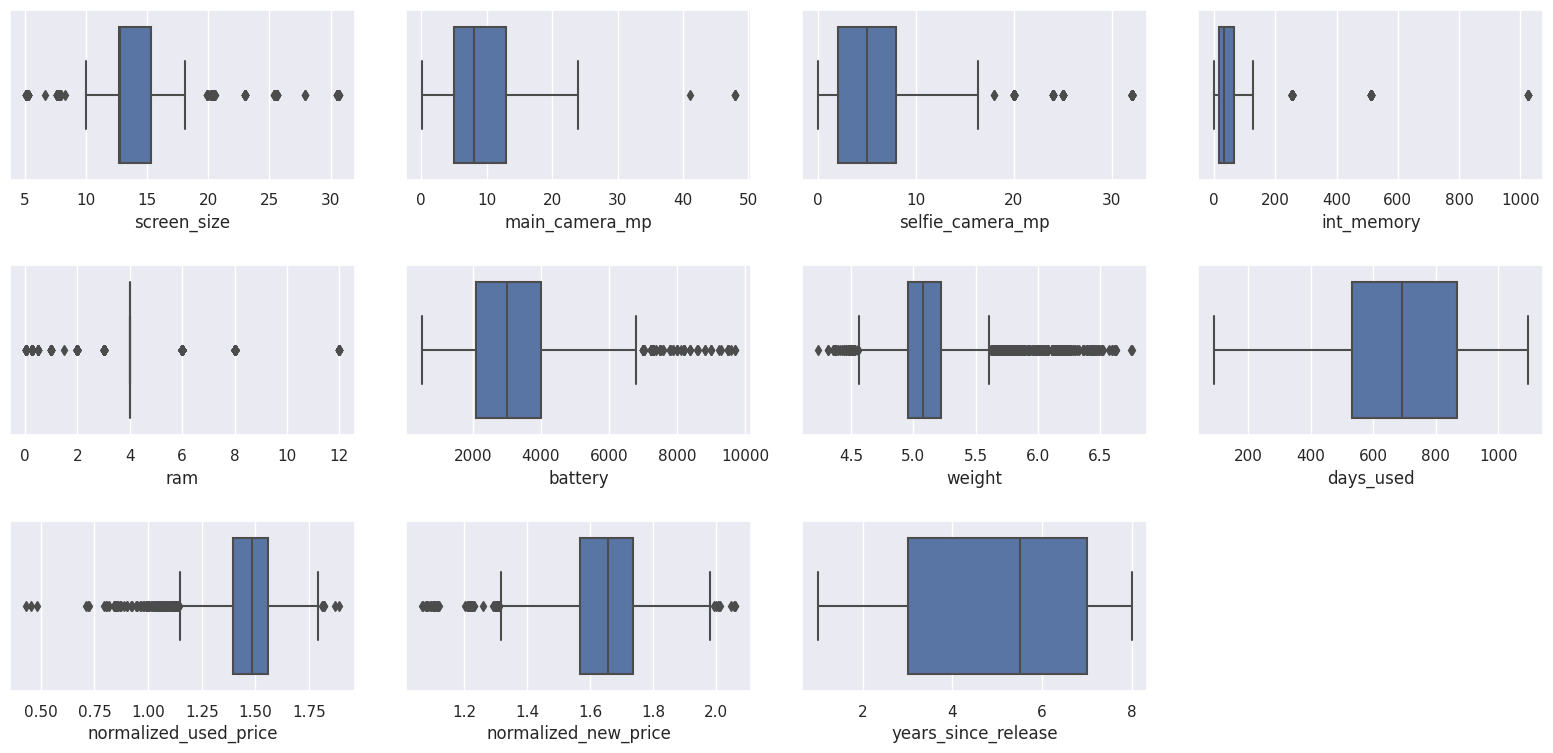

In [ ]:
# displaying boxplots after outlier treatment
num_cols = df_preprocess.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(16, 8))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_preprocess, x=variable)
    plt.tight_layout(pad=2)

plt.show()


Observations:

The scale of the data has changed, which can be seen on the axis of the boxplots of the log-transformed data being compressed scale comared to the original data's wide range.

Log transformation can make a skewed distribution more symmetric. This effect is not as dramatic in boxplot visualization so visualize this in the post-preprocessed EDA section so it can be more apparent when looking at histograms or kernel density plots.

Outliers already appear closer to the rest of the data, reducing their apparent impact.


Encoding Categorical Variables
using dummy variables (aka one-hot encoding).

In [41]:
# Create dummy variables for the categorical variables in the df_preprocess DataFrame
df_preprocess_encoded = pd.get_dummies(df_preprocess, columns=["brand_name", "os", "4g", "5g"], drop_first=True)
#confirm that the encoding has been applied
df_preprocess_encoded.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,4.983607,127,1.460375,1.550770,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,5.361292,325,1.641343,1.708200,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,5.361292,162,1.631411,1.772344,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,6.173786,345,1.636155,1.728280,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,5.220356,293,1.479328,1.598951,...,0,0,0,0,0,0,0,0,1,0


## Post-Preprocessing EDA

Conduct another round of EDA on preprocessed and feature-engineered dataset.

This helps to verify the effectiveness of the feature engineering and preprocessing.

In [42]:
def plot_hist_and_box(df_preprocess, variable, size=(16, 8), density_curve=False, num_bins=None):
    """
    Creates a plot with both a histogram and boxplot for a specified numerical variable.

    Args:
    - df_preprocess: The DataFrame containing the data.
    - variable: The name of the numerical variable to be plotted.
    - size: A tuple representing the size of the figure.
    - density_curve: A boolean indicating whether to overlay a KDE curve on the histogram.
    - num_bins: An integer representing the number of bins for the histogram, or None for automatic bin size.

    Returns:
    None
    """
    # Set up the matplotlib figure with two rows and one column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=size, sharex=True, gridspec_kw={'height_ratios': [0.2, 0.8]})

    # Plot the boxplot on the first row
    sns.boxplot(x=variable, data=df_preprocess, ax=ax1, showmeans=True, color="lightblue")
    ax1.set(xlabel='', title=f'Distribution and Boxplot of {variable}')

    # Plot the histogram on the second row
    if num_bins:
        sns.histplot(data[variable], kde=density_curve, bins=num_bins, ax=ax2, color="lightblue")
    else:
        sns.histplot(data[variable], kde=density_curve, ax=ax2, color="lightblue")

 # Draw lines for mean and median
    mean_val = df_preprocess[variable].mean()
    median_val = df_preprocess[variable].median()
    ax2.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax2.axvline(median_val, color='black', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    # Add legend to the histogram
    ax2.legend()

    plt.show()

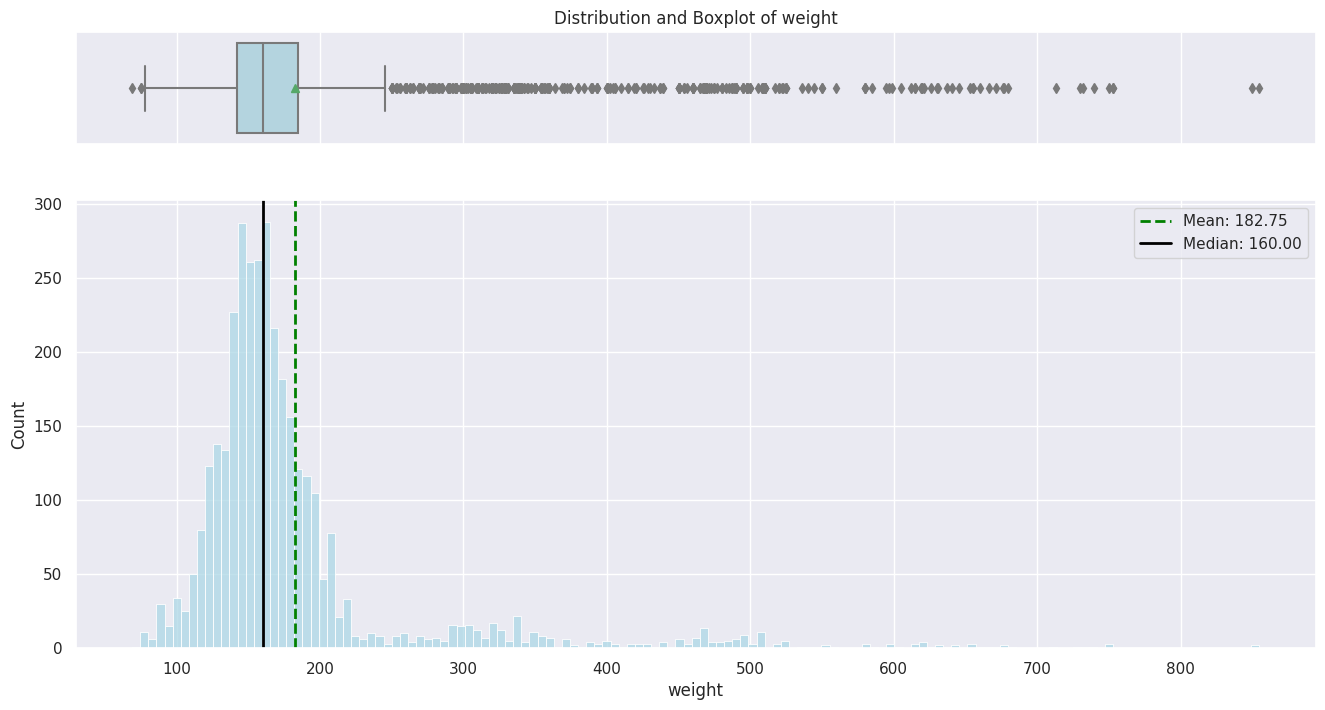

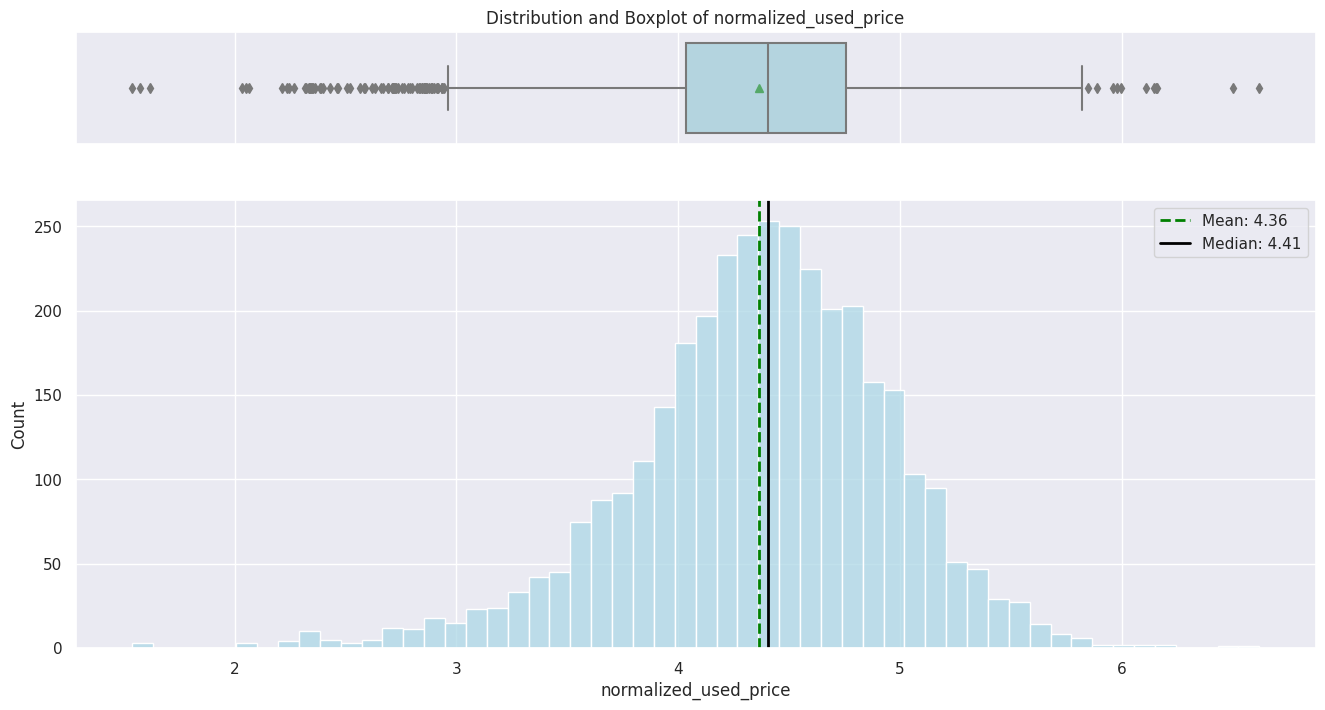

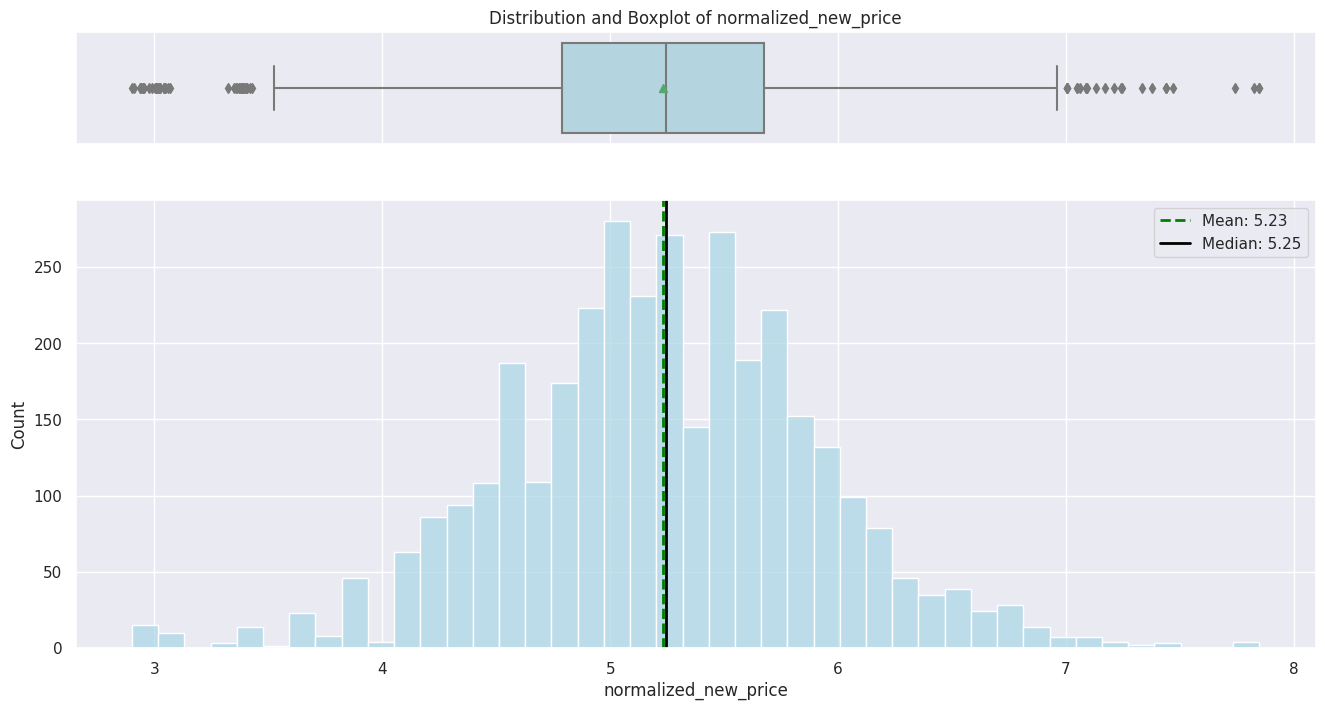

In [43]:
# List of all numerical variables in the df_eda DataFrame
numerical_variables = [
    'weight',
    'normalized_used_price',
    'normalized_new_price'
]

# Looping through the list and creating a histogram and boxplot for each variable
for variable in numerical_variables:
    plot_hist_and_box(df_eda, variable)

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [44]:
## Complete the code to define the dependent and independent variables
X = df_preprocess_encoded.drop('normalized_used_price', axis=1)
y = df_preprocess_encoded['normalized_used_price']

print(X.head())
print()
print(y.head())

   screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

     weight  days_used  normalized_new_price  years_since_release  ...  \
0  4.983607        127              1.550770                    1  ...   
1  5.361292        325              1.708200                    1  ...   
2  5.361292        162              1.772344                    1  ...   
3  6.173786        345              1.728280                    1  ...   
4  5.220356        293              1.598951                    1  ...   

   brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
0         

In [45]:
# let's add the intercept to data
X = sm.add_constant(X)

In [46]:
# Creating dummy variables for categorical features if any remain after initial processing
# dummies have already beencreated so this step might not be necessary,
# but includeing it in case there are any remaining categorical variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,4.983607,127,1.550770,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,5.361292,325,1.708200,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,5.361292,162,1.772344,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,6.173786,345,1.728280,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,5.220356,293,1.598951,...,0,0,0,0,0,0,0,0,1,0


In [47]:
# Splitting the data in a 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression


In [49]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     258.8
Date:                   Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                           22:16:51   Log-Likelihood:                 3427.4
No. Observations:                   2417   AIC:                            -6757.
Df Residuals:                       2368   BIC:                            -6473.
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


OLS regression results of the fitted model:

* R-squared: 0.840 suggests that the model explains 84% of the variance in the dependent variable, which is a strong fit.
* Adj. R-squared: 0.837 is also strong and very close to the R-squared, indicating that most variables contribute meaningfully to the model.
* F-statistic and Prob (F-statistic): Here it is significant (p-value  0), suggesting that the model is a better fit than an intercept-only model.
* Coefficients: The coefficients tell us the amount of change in the dependent variable per one-unit change in an independent variable, holding other variables constant. For instance, normalized_new_price has a coefficient of 0.5479, which is significant (p < 0.001).
* P>|t|: This column shows the p-value for the hypothesis test that each coefficient is different from zero (no effect). A low p-value (< 0.05) suggests that the effect is likely not due to chance.
* [0.025 0.975]: These are the 95% confidence intervals for the coefficients. If this range does not include zero, it suggests that we are 95% confident that the true coefficient is not zero.
* Omnibus/Prob(Omnibus): Tests the skewness and kurtosis of the residuals. A significant value indicates the residuals may not be normally distributed.
* Skew: A measure of the symmetry of the residuals. A skew near zero suggests the residuals are normally distributed.
* Kurtosis: A measure of the shape of the distribution of residuals. Higher kurtosis can indicate outliers.
* Durbin-Watson: A test statistic that checks for autocorrelation in the residuals. A value close to 2 suggests there is no autocorrelation.
* Jarque-Bera (JB)/Prob(JB): Another test of the normality of residuals. A significant value indicates the residuals are not normally distributed.
* Condition Number: Indicates potential multicollinearity if it's very high. Here it is quite large.
* From the summary, it seems like the model is quite good at explaining the variance in the used price of the phones. However, there might be issues with multicollinearity, as indicated by the condition number, and the residuals might not be normally distributed (based on the Omnibus and Jarque-Bera tests).

**Nest step:**
* Investigate further into the multicollinearity issue by looking at the variance inflation factor (VIF) for the predictors.
* For the normality of residuals apply transformations

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [50]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [51]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
print(olsmodel1_train_perf)

Training Performance

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.058603  0.043148   0.839882        0.836567  3.147233


In [52]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
print(olsmodel1_test_perf)

Test Performance

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.060143  0.045157   0.825072        0.816388  3.277546


**Training Set Performance**
* RMSE (Root Mean Squared Error): 0.058603. This value indicates the standard deviation of the prediction errors or residuals. A lower RMSE is better, and it suggests that the model can predict the dependent variable more accurately with less error.
* MAE (Mean Absolute Error): 0.043148. This shows the average absolute difference between the observed actual outcomes and the predictions by the model. Again, a lower value is better.
* R-squared: 0.839882. This implies that about 84% of the variance in the dependent variable is explained by the model. It's a measure of how well the observed outcomes are replicated by the model.
* Adjusted R-squared: 0.836567. This is adjusted for the number of predictors in the model and is more reliable for comparing models with a different number of predictors. A high value close to R-squared indicates that most predictors are useful.
* MAPE (Mean Absolute Percentage Error): 3.147233%. This is the average absolute percent error for each prediction. It's a measure of prediction accuracy in a regression model.

**Test Set Performance**
* RMSE: 0.060143. Slightly higher than the training set, which is expected as the model is now predicting on unseen data.
* MAE: 0.045157. Again, slightly higher on the test set, indicating a bit more error in predictions on unseen data.
* R-squared: 0.825072. This shows that the model explains about 82.5% of the variance in the test data, which is slightly lower than the training set but still indicates a good fit.
* Adjusted R-squared: 0.816388. This lower value compared to the training set is typical, as it adjusts for the number of predictors and the model is now dealing with new data.
* MAPE: 3.277546%. This increase compared to the training set shows that the model's predictions are less accurate on the test data.

**General Interpretation**
* The model performs well on both training and test sets, with good R-squared values and relatively low error metrics (RMSE, MAE, MAPE).
* The slight increase in error metrics and decrease in R-squared on the test set compared to the training set is typical and shows that the model is not overfitting the training data and is generalizing well to new data.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



Checking for multicollinearity using the Variance Inflation Factor (VIF) since we are working with a multiple regression model. The VIF quantifies how much the variance of an estimated regression coefficient increases if your predictors are correlated. If no factors are correlated, the VIFs will all be equal to 1.

- **General Rule of thumb**:
- VIF = 1: No correlation between the $k$th predictor and the remaining predictor variables.
- VIF >= 5: Moderate multicollinearity.
- VIF >= 10: High multicollinearity.

Let's define a function to check VIF.

In [53]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [54]:
vif_data = checking_vif(x_train)
print(vif_data)

                  feature          VIF
0                   const  1224.273226
1             screen_size     7.688213
2          main_camera_mp     2.413162
3        selfie_camera_mp     2.866312
4              int_memory     1.336159
5                     ram     2.272023
6                 battery     4.090152
7                  weight     6.383533
8               days_used     2.569614
9    normalized_new_price     3.334107
10    years_since_release     4.809220
11     brand_name_Alcatel     3.469225
12       brand_name_Apple    11.246023
13        brand_name_Asus     3.653514
14  brand_name_BlackBerry     1.624773
15      brand_name_Celkon     1.880742
16     brand_name_Coolpad     1.577062
17      brand_name_Gionee     2.077867
18      brand_name_Google     1.387671
19         brand_name_HTC     3.465783
20       brand_name_Honor     3.567939
21      brand_name_Huawei     6.407917
22     brand_name_Infinix     1.191741
23     brand_name_Karbonn     1.636892
24          brand_name_LG

* The VIF for the constant term is extremely high. However, this is usually not a concern as the constant term doesn't represent a predictor variable.

**High Multicollinearity in Some Variables:**

* `screen_size`: moderate multicollinearity. This could be due to its correlation with other features like battery, weight, etc.
* `weight`: moderate multicollinearity.
* `years_since_release`: Approaching the threshold of 5, suggesting some degree of multicollinearity.
* `brand_name_Apple`, `brand_name_Samsung`, `brand_name_Others`, and `os_iOS`: These have high VIF values, indicating significant multicollinearity. **HOWEVER these are dummy variables (aka categorical variables) and should not be dropped since VIF only measures numerical variables. Drop categorical variables during the p-values drop treatement.**



### Removing Multicollinearity



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [55]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [56]:
# Specifying the columns with high VIF
col_list = ['screen_size','weight','os_iOS',]

# Checking the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train, y_train, col_list)
print(res)



           col  Adj. R-squared after_dropping col  RMSE after dropping col
0       os_iOS                           0.836699                 0.059195
1       weight                           0.833912                 0.059698
2  screen_size                           0.832761                 0.059905


Observations:

The results show the impact on the adjusted R-squared and RMSE after sequentially dropping each of the high VIF columns from the model:

**Adjusted R-squared:** A _higher adjusted R-squared is better_. When a column is dropped, minimal reduction in this value is ideal.

**RMSE:** A _lower RMSE is better_, indicating that the model's predictions are more accurate.


In [57]:
# Specify the column to drop based on the results
col_to_drop = 'screen_size'

# Dropping the column 'screen_size' from training and testing sets
x_train2 = x_train.drop('screen_size', axis=1)
x_test2 = x_test.drop('screen_size', axis=1)


# Check VIF now for the updated training data
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
print(vif)


VIF after dropping screen_size
                  feature         VIF
0                   const  831.379635
1          main_camera_mp    2.411865
2        selfie_camera_mp    2.863452
3              int_memory    1.331836
4                     ram    2.270061
5                 battery    3.763740
6                  weight    3.079674
7               days_used    2.564528
8    normalized_new_price    3.295771
9     years_since_release    4.742779
10     brand_name_Alcatel    3.463094
11       brand_name_Apple   11.124467
12        brand_name_Asus    3.652041
13  brand_name_BlackBerry    1.623364
14      brand_name_Celkon    1.879984
15     brand_name_Coolpad    1.577033
16      brand_name_Gionee    2.072404
17      brand_name_Google    1.387343
18         brand_name_HTC    3.465437
19       brand_name_Honor    3.562479
20      brand_name_Huawei    6.406448
21     brand_name_Infinix    1.191500
22     brand_name_Karbonn    1.632712
23          brand_name_LG    5.372149
24        brand_nam

After dropping `screen_size'` from the train dataset the `weight` VIF score went down to 3.07.  So, no need to drop that anymore.

**Next Step:**
Could remove os_iOS next and then reassess the VIF scores but let's looked at the categorical variables and drop the ones with high p-values first.

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [59]:
# Initial list of columns from x_train3
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set
    x_train_aux = predictors[cols]

    # Fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Celkon', 'brand_name_Nokia', 'brand_name_Others', 'brand_name_Xiaomi', 'os_Others', '5g_yes']


In [60]:
# Specifying the refined train and test data
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [61]:
# Fit OLS model on updated dataset after dropping high VIF values of numerical variables and high p-values of categorical (and numerical?)
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.998
Model:                               OLS   Adj. R-squared (uncentered):              0.998
Method:                    Least Squares   F-statistic:                          1.211e+05
Date:                   Mon, 11 Dec 2023   Prob (F-statistic):                        0.00
Time:                           22:28:23   Log-Likelihood:                          3380.7
No. Observations:                   2417   AIC:                                     -6737.
Df Residuals:                       2405   BIC:                                     -6668.
Df Model:                             12                                                  
Covariance Type:               nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-

OLS Regression Results after VIF and dropping high p-value features:

* R-squared ( 0.998) & Adjusted R-squared (0.998): These values are high, indicating that the model explains a significant portion of the variance in the dependent variable, normalized_used_price.
* P-Values:

All predictors now have p-values less than 0.05, indicating that they are statistically significant at the 5% level.



In [62]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
print(olsmodel2_train_perf)

Training Performance

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.059745  0.043873   0.833584        0.832753  3.208278


In [63]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
print(olsmodel2_test_perf)

Test Performance

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.060653  0.045606   0.822089        0.820004  3.314013


**Model Performance**

**On Training Data**
* RMSE and MAE: These values are relatively low, indicating good model accuracy.
* R-squared and Adjusted R-squared: These are consistent with the regression results, confirming a good fit.

**On Testing Data**
* RMSE and MAE are slightly higher than in the training set but still indicate reasonable accuracy.
* Adjusted R-squared is slightly lower than in the training set, which is expected as the model is now predicting unseen data.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

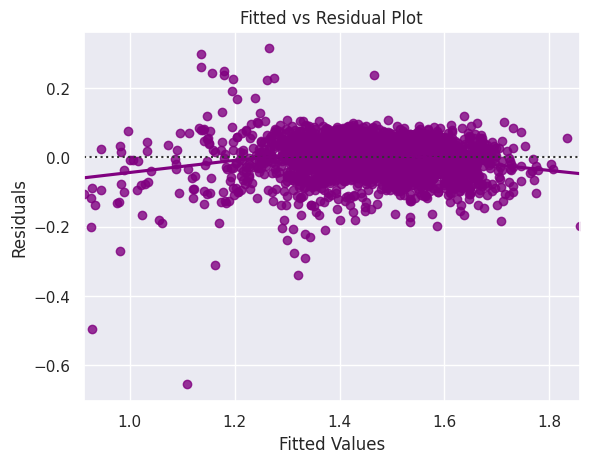

In [64]:
# Creating a dataframe with actual, fitted, and residual values
df_pred = pd.DataFrame({
    "Actual Values": y_train,  # actual values
    "Fitted Values": olsmodel2.fittedvalues,  # predicted values
    "Residuals": olsmodel2.resid  # residuals
})

# Plotting the fitted values vs residuals
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual Plot")
plt.show()

Observations:

* The plot does not indicate any obvious violations of the linearity and independence assumptions.
* The residuals appear to be randomly distributed around the zero line, suggesting that the model's predictions are unbiased on average across the range of fitted values. This is a good sign for the validity of the OLS regression model.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

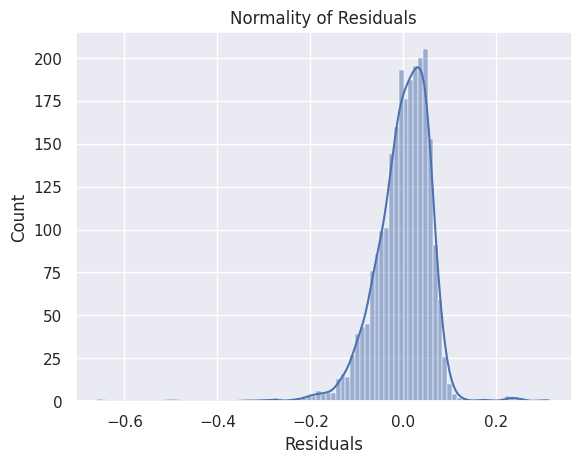

In [67]:
# Histogram of Residuals: show if they are normally distributed.
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

Observations:

From the plot, the distribution of the residuals appears to be roughly bell-shaped, which is a good indicator that they may be normally distributed, as this is a key assumption of linear regression.

For a more definitive test of normality:

1. Look at a Q-Q (Quantile-Quantile) plot, as it provides a point-by-point depiction of the distribution's fit to normality.
2. Perform a Shapiro-Wilk test. A p-value greater than 0.05 from this test would suggest that the residuals are normally distributed.

These tests, along with the histogram, are part of a comprehensive approach to diagnosing the model's assumptions and ensuring its validity.

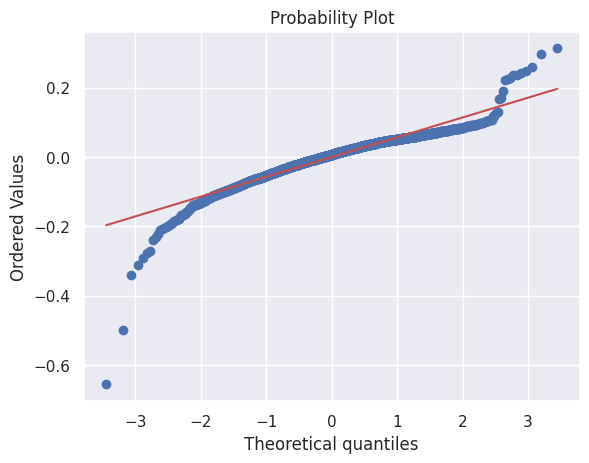

In [68]:
import pylab
import scipy.stats as stat  # This defines the alias 'stat' for scipy.stats

# Q-Q Plot: plot compares the distribution of residuals with a normal distribution.
stat.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()


Observations:

The Q-Q plot is further investigation weather or not the dataset follows a particular distribution—in this case, a normal distribution.
How to interpret the Q-Q plot:

If the points roughly follow the red line (which represents the expected quantiles from a normal distribution), then the data can be considered normally distributed.

* Most of the points seem to follow the line closely, especially in the middle portion (between -1 and 1 in theoretical quantiles), which suggests that the residuals are normally distributed in that range (majority of the data).
* There are some deviations from the line at the ends, particularly in the lower left and the upper right of the plot. These deviations indicate that the residuals have heavier tails than a normal distribution, which is a sign of potential outliers or a non-normal distribution in the tails.



In [69]:
# Shapiro-Wilk Test: assesses normality of residuals
stat.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9138555526733398, pvalue=5.11099376210576e-35)

Observations:

* The statistic value of approximately 0.913 suggests the data may not follow a normal distribution, as this value is far from 1, which would indicate a perfect fit to the normal distribution.
* The p-value is extremely low (practically 0 when considering floating-point precision), which is well below the common alpha level of 0.05. A low p-value like this leads us to reject the null hypothesis of the test, which states that the data is normally distributed.
Therefore, according to the Shapiro-Wilk test,the residuals are not normally distributed HOWEVER, graphs show normality trends and are satisfactory, in terms of industry standards...apparently.



### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the Goldfeld-Quandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [71]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
# Goldfeld-Quandt Test:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3[selected_features])
lzip(name, test)


[('F statistic', 0.8257362624188471), ('p-value', 0.9995308810270375)]

Observations:

* The p-value is approximately 1.0, which is much higher than the common alpha level of 0.05 and the assumption of homoscedasticity cannot be rejected.
* In this case, the p-value is extremely high, which suggests that the residuals are homoscedastic, meaning the variance of the residuals does not significantly vary with the fitted values.

This means model meets one of the critical assumptions of linear regression, which is the assumption of homoscedasticity.

## Final Model Summary

In [72]:
#Fit the Final Model:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.998
Model:                               OLS   Adj. R-squared (uncentered):              0.998
Method:                    Least Squares   F-statistic:                          1.211e+05
Date:                   Mon, 11 Dec 2023   Prob (F-statistic):                        0.00
Time:                           22:45:40   Log-Likelihood:                          3380.7
No. Observations:                   2417   AIC:                                     -6737.
Df Residuals:                       2405   BIC:                                     -6668.
Df Model:                             12                                                  
Covariance Type:               nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-

In [74]:
# checking model performance on training data set (seen 70% data)
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train)
print("Training Performance\n", olsmodel_final_train_perf)

Training Performance
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.059745  0.043873   0.833584        0.832753  3.208278


In [75]:
# checking model performance on testing data set (seen 30% data)
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
print("Test Performance\n", olsmodel_final_test_perf)

Test Performance
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.060653  0.045606   0.822089        0.820004  3.314013


## Actionable Insights and Recommendations

The final model summary for Ordinary Least Squares (OLS)

**Model Usage:**
* This model can be a valuable tool for predicting used device prices based on their specifications and features. It could be used by resellers, e-commerce platforms, or in inventory management systems.

**Model Fit:**
* The R-squared value of 0.998 indicates that approximately 99.8% of the variability in the dependent variable is explained by the model.
* The Adjusted R-squared of 0.998 is the same as the R-squared value, which suggests that removal or the inclusion of additional predictors is justified.

**Statistical Significance:**
* All the predictors in the model are statistically significant at the 0.05 level, as indicated by their p-values being less than 0.05. This includes both technical specifications of the devices and the binary indicators for different brands and features.

**Coefficients:**
* main_camera_mp, selfie_camera_mp, ram, weigh, normalized_new_price, and certain brand names have positive coefficient, suggesting that the presence of those features tend to have a higher used price. A unit increase in these features results in the same unit increase inthe prices of used device price.

**Model Insights:**
* The model suggests that both technical specifications and the brand have a significant impact on the used price of devices.
The negative coefficient for 5g_yes might be counterintuitive at first glance, but it could reflect that at the time of the data, 5G devices were possibly newer and had a steeper depreciation rate, or it could be capturing some other market dynamics but most likely it is related to the limited number of datapoints for this group.





-


___